<a href="https://colab.research.google.com/github/DanaDewita/Datasciencecoursera/blob/master/Dana%20Dewita_FoodHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

In [8]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# uncomment and run the following lines for Google Colab

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
# Write your code here to read the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


The DataFrame has 9 columns as mentioned in data dictionary. Each row contains data of order placed by a customer. I am previewing recommeded plots to have a quick overview of data characteristics.

In [ ]:
#Question 1: How many rows and columns are present in the data? [0.5 mark]
num_rows = data.shape[0]
num_columns = data.shape[1]

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1898
Number of columns: 9


There are 1898 rows of data throughout the 9 columns. There is no missing data. However, there are some rows that have "Not given" in the ratings column.

In [ ]:
#Question 2: What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Order ID, customer ID, are integers though they are categorical; food prep time and delivery time are integers and reflect time it takes. Cost of order is correctly a float since they include dollars and cents. All the other categories are objects appropriately. Rating, which though is a numerical value for 1-5, are categorical data type and are thus correctly object data type.

Rating Percentages:
Not given: 38.78%
5: 30.98%
4: 20.34%
3: 9.91%


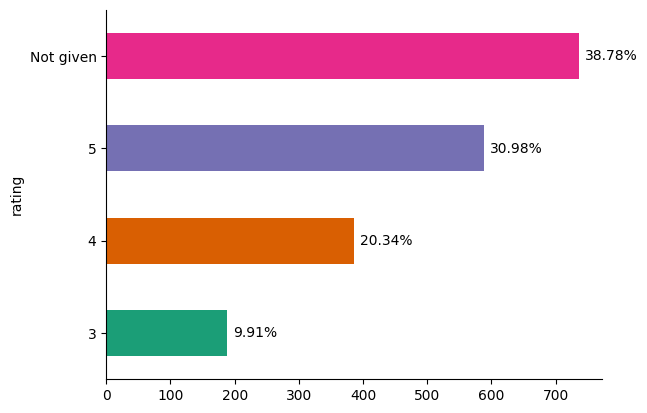

In [ ]:
#Question 3: Are there any missing values in the data? If yes, treat them using an appropriate method.
#Rating has "Not given, which is missing rating", we need to count how many "Not given" values are in the rating column, asign NaN to them and change the datatype to numeric
not_given_count = (data['rating'] == "Not given").sum()

# Calculate the total number of rows
total_rows = len(data)

# Calculate the count and percentage for each rating category
# In pandas versions prior to 1.1.0, use dropna=False instead of include='all'
rating_counts = data['rating'].value_counts(dropna=False)  # Include NaN values
rating_percentages = (rating_counts / total_rows) * 100

# Print the percentages
print("Rating Percentages:")
for rating, percentage in rating_percentages.items():
    print(f"{rating}: {percentage:.2f}%")

from matplotlib import pyplot as plt
import seaborn as sns

# Create the bar plot
ax = data.groupby('rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Annotate bars with percentages
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 10,  # Adjust position as needed
             p.get_y() + p.get_height() / 2,
             f'{width / total_rows * 100:.2f}%',
             ha='left', va='center')

plt.show()

As seen above 38.78% do not have reviews.

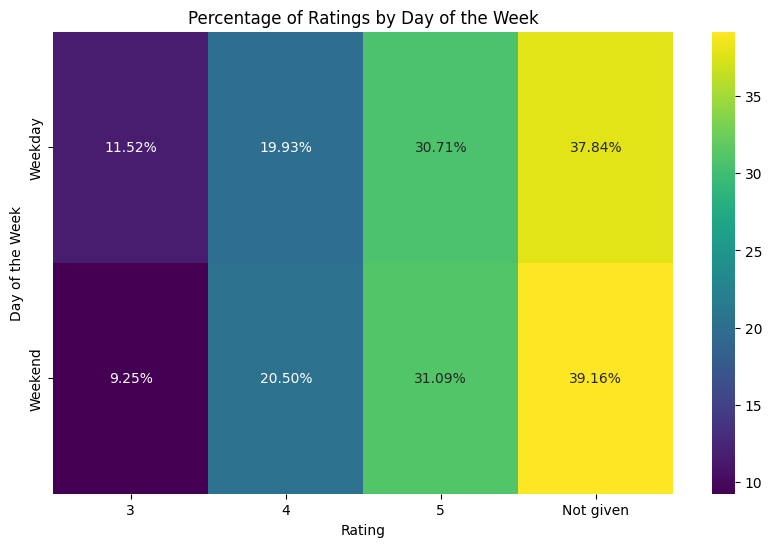

In [ ]:
# Calculate the count and percentage for each rating category
# In pandas versions prior to 1.1.0, use dropna=False instead of include='all'
rating_counts = data['rating'].value_counts(dropna=False)  # Include NaN values
rating_percentages = (rating_counts / total_rows) * 100

# Create a heatmap to visualize the percentages
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
ax = sns.heatmap(day_rating_cross_tab, annot=True, cmap='viridis', fmt=".2f")

# Annotate percentages within cells
for t in ax.texts:
    t.set_text(t.get_text() + "%")

plt.title('Percentage of Ratings by Day of the Week')
plt.xlabel('Rating')
plt.ylabel('Day of the Week')
plt.show()

In [ ]:
# Filter out "Not given" ratings
filtered_data = data[data['rating'] != "Not given"]

# Calculate the total number of valid ratings
total_valid_ratings = len(filtered_data)

# Calculate the count of ratings with 3, 4, or 5
ratings_3_4_5_count = filtered_data['rating'][filtered_data['rating'].isin(['3', '4', '5'])].count()

# Calculate the percentage
percentage_3_4_5 = (ratings_3_4_5_count / total_valid_ratings) * 100

# Print the result
print(f"Percentage of ratings with 3, 4, or 5 (excluding 'Not given'): {percentage_3_4_5:.2f}%")

Percentage of ratings with 3, 4, or 5 (excluding 'Not given'): 100.00%


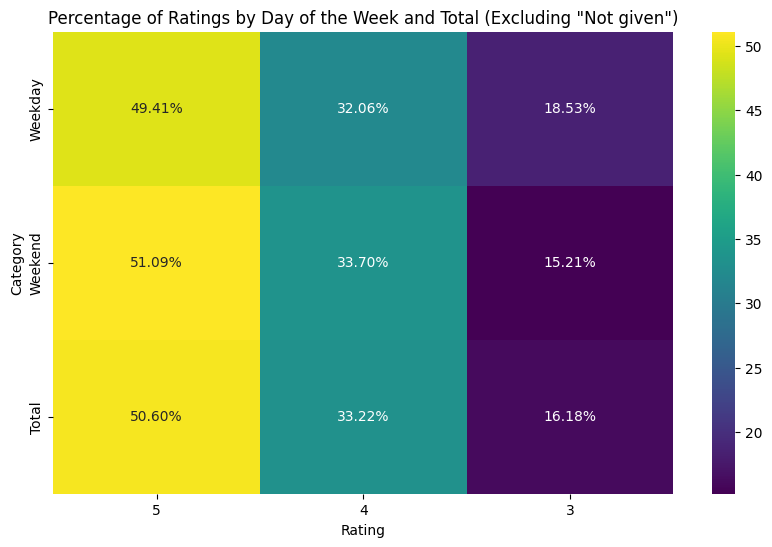

In [ ]:
# Create a new column for total (combining weekday and weekend)
data['Total'] = 'Total'

# Create a list of categories for the heatmap
categories = ['Weekday', 'Weekend', 'Total']

# Create an empty dictionary to store the data for the heatmap
heatmap_data = {}

# Iterate through each category
for category in categories:
    # Filter the data based on the current category
    if category == 'Total':
        filtered_data = data[data['rating'] != 'Not given']  # Exclude 'Not given' for Total
    else:
        filtered_data = data[(data['day_of_the_week'] == category) & (data['rating'] != 'Not given')]  # Exclude 'Not given'

    # Calculate the count and percentage for each rating
    rating_counts = filtered_data['rating'].value_counts(dropna=False)
    rating_percentages = (rating_counts / len(filtered_data)) * 100

    # Store the percentages in the heatmap_data dictionary
    heatmap_data[category] = rating_percentages

# Create a DataFrame from the heatmap_data dictionary
heatmap_df = pd.DataFrame(heatmap_data).T.fillna(0)  # Transpose and fill NaN with 0

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
ax = sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt=".2f")

# Annotate percentages within cells
for t in ax.texts:
    t.set_text(t.get_text() + "%")

plt.title('Percentage of Ratings by Day of the Week and Total (Excluding "Not given")')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.show()

Comparing weekdays and weekend, more customers do not leave rating even though for those who do, more gave 4's and 5's compared to weekday orders. Could be that even though customers are happier with their orders, less are leaving reviews.

In [ ]:
#Question 4: Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]
data.describe()


,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.0,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.0,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.0,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.0,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.0,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.0,35.000000,33.000000


From the above, where rating count is 1162, those with "Not given" are not counted.
The mean order is $16.50 even though median order is $14.10, which means order cost is skewed to the right since more data are higher than median. This is good since it shows more customers are ordering more than the median amount.
50% of orders rated got ratings of 5, which shows high customer satisfaction.
75% of orders' prep time and delivery time added is right below the 60 min mark. Max is 68 mins which is 8 mins over the hour, that shows it is acceptable time frame, without too much delay.
Standard deviation for less than 5 mins for both food prep and food delivery shows consistency for both processes. This consistency could be a reason 50% of ratings are 5's.


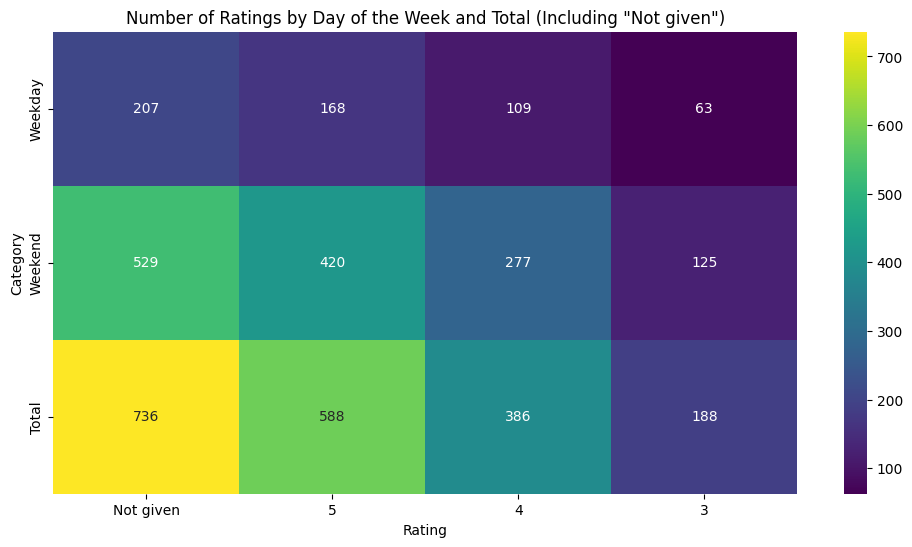

In [ ]:
# Question 5: How many orders are not rated? [1 mark]
# Create a new column for total (combining weekday and weekend)

data['Total'] = 'Total'

# Create a list of categories for the heatmap
categories = ['Weekday', 'Weekend', 'Total']

# Create a dictionary to store the data for the heatmap
heatmap_counts = {}  # Dictionary to store counts

# Iterate through each category
for category in categories:
    # Filter the data based on the current category
    if category == 'Total':
        filtered_data = data
    else:
        filtered_data = data[data['day_of_the_week'] == category]

    # Calculate the count for each rating, including 'Not given'
    rating_counts = filtered_data['rating'].value_counts(dropna=False)

    # Store the counts in the heatmap_counts dictionary
    heatmap_counts[category] = rating_counts

# Create a DataFrame from the dictionary
heatmap_counts_df = pd.DataFrame(heatmap_counts).T.fillna(0)  # Transpose and fill NaN with 0

# Create the heatmap using seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.heatmap(heatmap_counts_df, annot=True, cmap='viridis', fmt=".0f") # fmt=".0f" to display as integers

plt.title('Number of Ratings by Day of the Week and Total (Including "Not given")')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.show()

In [ ]:
# Check for blank ratings
blank_ratings_count = data['rating'].isnull().sum()

# Check for "Not given" ratings (which might be considered blank)
not_given_ratings_count = (data['rating'] == "Not given").sum()

# Print the results
print(f"Number of rows with blank (NaN) rating: {blank_ratings_count}")
print(f"Number of rows with 'Not given' rating: {not_given_ratings_count}")

Number of rows with blank (NaN) rating: 0
Number of rows with 'Not given' rating: 736


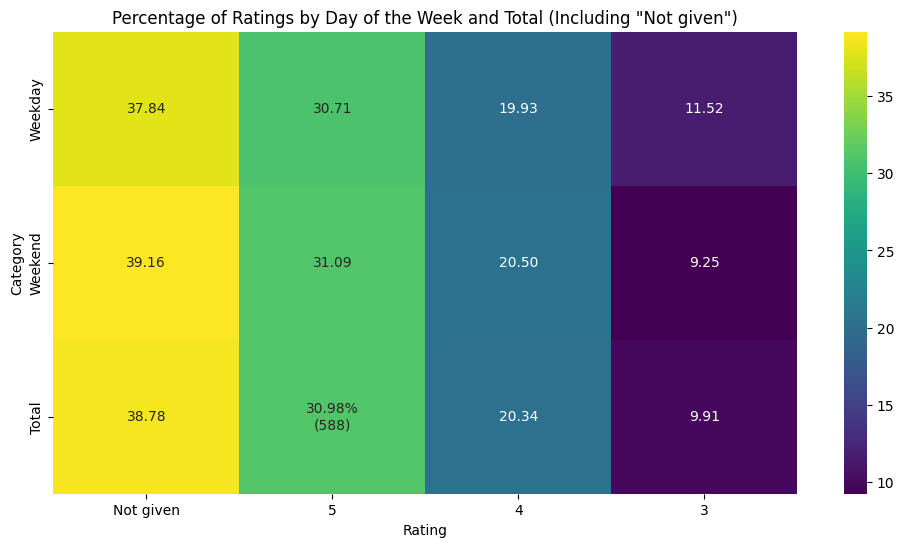

There are no duplicate orders, which means all orders are unique. Of those, 736 or 38.78% were not rated.

In [ ]:
#Question 6: Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

# check unique cuisine type
data['cuisine_type'].nunique()

14

In [ ]:
# Calculate the number of unique restaurants
num_restaurants = data['restaurant_name'].nunique()

# Print the result
print(f"There are {num_restaurants} unique restaurants in the dataset.")

There are 178 unique restaurants in the dataset.


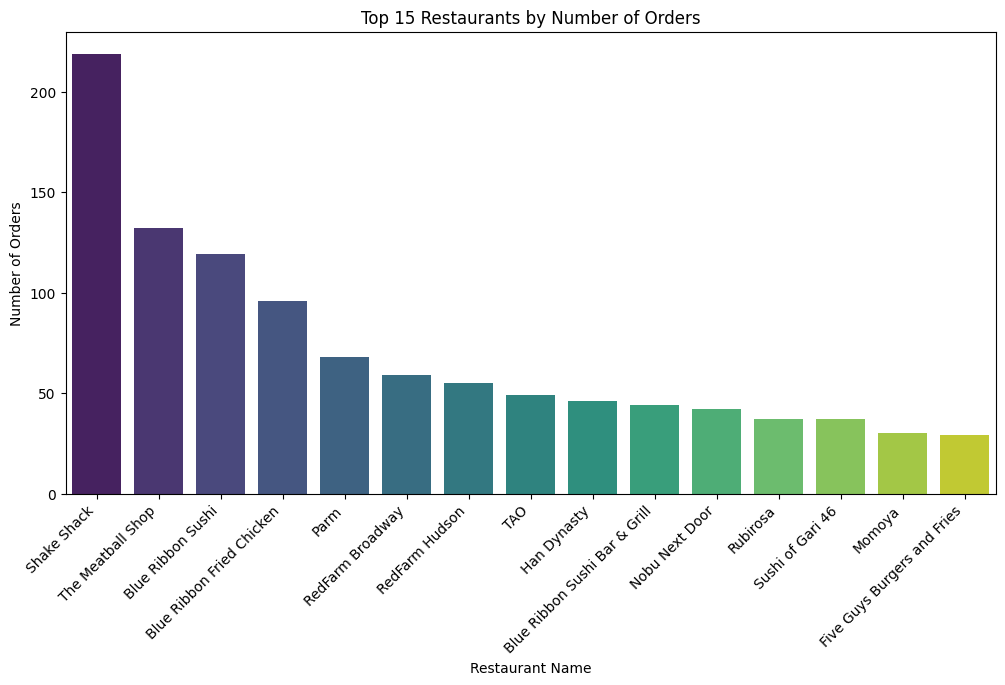

In [12]:
# Group by restaurant name and count the number of orders
restaurant_order_counts = data.groupby('restaurant_name')['order_id'].count()

# Sort the restaurants by order count in descending order and select the top 15
top_15_restaurants = restaurant_order_counts.sort_values(ascending=False).head(15)

# Create the bar chart using Seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=top_15_restaurants.index, y=top_15_restaurants.values, hue=top_15_restaurants.index, palette='viridis', legend=False)
plt.title('Top 15 Restaurants by Number of Orders')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

Top 10 Restaurants with the Most Orders Rated 3:
restaurant_name
Shake Shack                  23
Blue Ribbon Sushi            16
Blue Ribbon Fried Chicken    11
The Meatball Shop            10
Parm                          9
RedFarm Hudson                9
RedFarm Broadway              8
Rubirosa                      5
Jack's Wife Freda             5
Blue Ribbon Sushi Izakaya     4
Name: order_id, dtype: int64


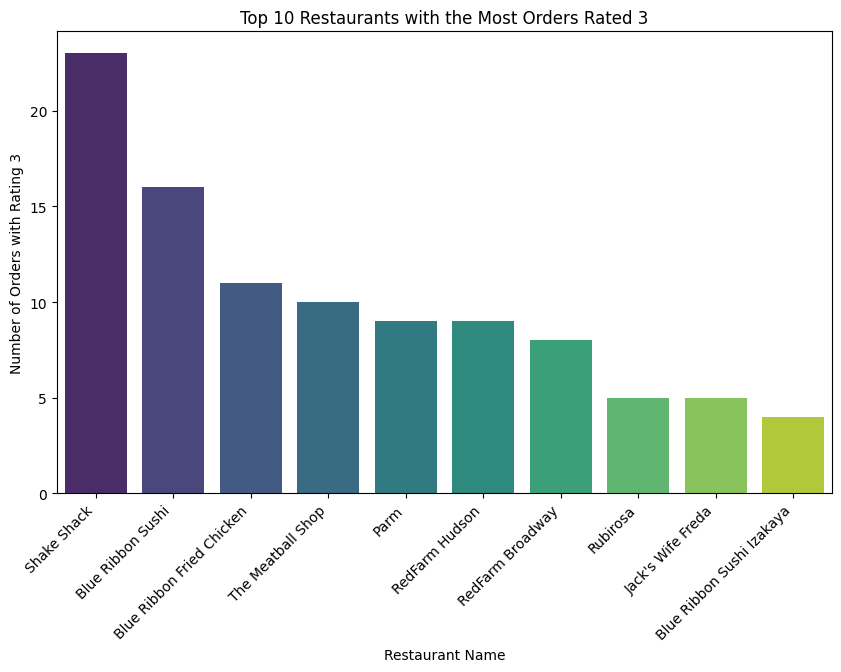

In [14]:
# Filter data for orders with rating 3
rating_3_data = data[data['rating'] == '3']

# Group by restaurant name and count orders with rating 3
restaurant_rating_3_counts = rating_3_data.groupby('restaurant_name')['order_id'].count()

# Sort restaurants by count of rating 3 in descending order
top_10_restaurants = restaurant_rating_3_counts.sort_values(ascending=False).head(10)

# Print the top 10 restaurants and their counts
print("Top 10 Restaurants with the Most Orders Rated 3:")
print(top_10_restaurants)

# Create a bar chart for better visualization
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
# Changed to plot top_10_restaurants instead of top_15_restaurants
sns.barplot(x=top_10_restaurants.index, y=top_10_restaurants.values, hue=top_10_restaurants.index, palette='viridis', legend=False)
plt.title('Top 10 Restaurants with the Most Orders Rated 3')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders with Rating 3')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

Top 10 Restaurants with the Most Orders Rated 4:
restaurant_name
Shake Shack                  50
Blue Ribbon Sushi            25
Blue Ribbon Fried Chicken    21
The Meatball Shop            21
Parm                         16
RedFarm Broadway             15
TAO                          12
Rubirosa                     11
RedFarm Hudson               10
Momoya                       10
Name: order_id, dtype: int64


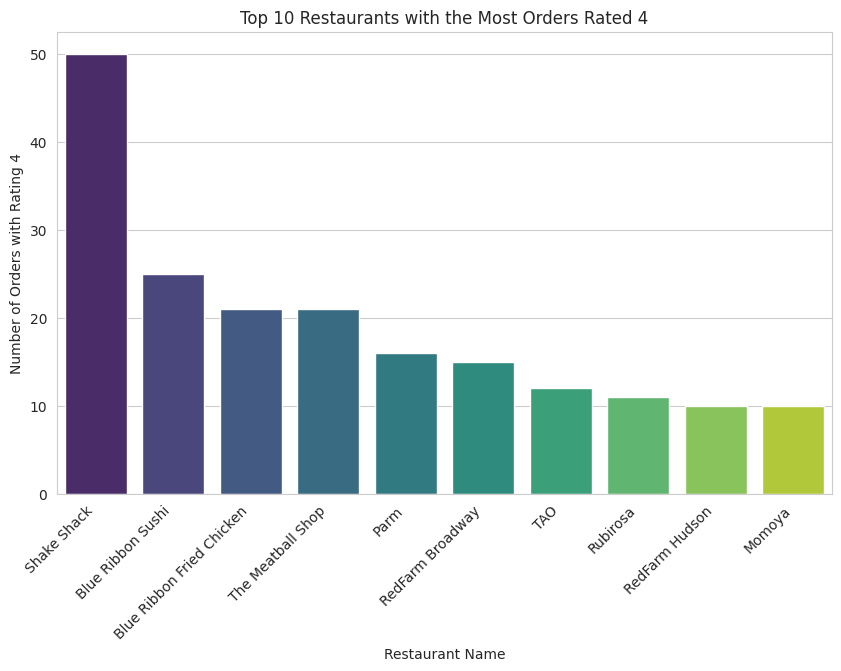

In [80]:
# Now you can use 'data' in your code
rating_4_data = data[data['rating'] == '4']

# Group by restaurant name and count orders with rating 4
restaurant_rating_4_counts = rating_4_data.groupby('restaurant_name')['order_id'].count()

# Sort restaurants by count of rating 4 in descending order
top_10_restaurants_4 = restaurant_rating_4_counts.sort_values(ascending=False).head(10)

# Print the top 10 restaurants and their counts
print("Top 10 Restaurants with the Most Orders Rated 4:")
print(top_10_restaurants_4)

# Create a bar chart for better visualization
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
# Changed hue to top_10_restaurants_4.index to ensure all arrays have the same length
sns.barplot(x=top_10_restaurants_4.index, y=top_10_restaurants_4.values, hue=top_10_restaurants_4.index, palette='viridis', legend=False)
plt.title('Top 10 Restaurants with the Most Orders Rated 4')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders with Rating 4')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

Top 10 Restaurants with the Most Orders Rated 5:
restaurant_name
Shake Shack                      60
The Meatball Shop                53
Blue Ribbon Sushi                32
Blue Ribbon Fried Chicken        32
RedFarm Broadway                 18
RedFarm Hudson                   15
Blue Ribbon Sushi Bar & Grill    15
Parm                             14
Han Dynasty                      13
TAO                              13
Name: order_id, dtype: int64


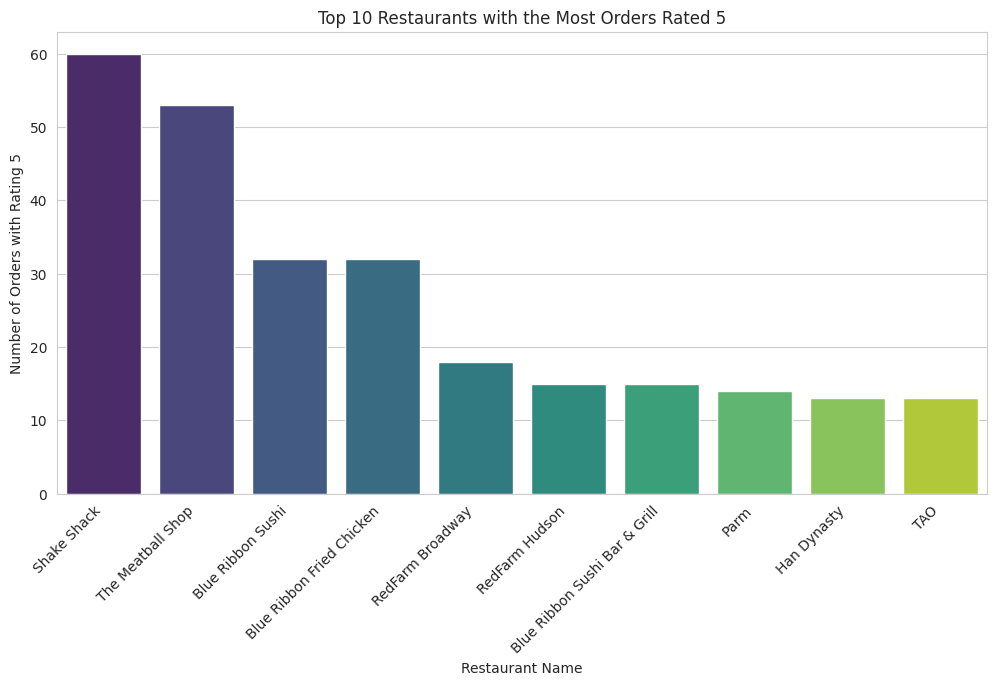

In [84]:
# Filter data for orders with rating 5
rating_5_data = data[data['rating'] == '5']

# Group by restaurant name and count orders with rating 5
restaurant_rating_5_counts = rating_5_data.groupby('restaurant_name')['order_id'].count()

# Sort restaurants by count of rating 5 in descending order
top_10_restaurants_5 = restaurant_rating_5_counts.sort_values(ascending=False).head(10)

# Print the top 15 restaurants and their counts
print("Top 10 Restaurants with the Most Orders Rated 5:")
print(top_10_restaurants_5)

# Create a bar chart for better visualization
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=top_10_restaurants_5.index, y=top_10_restaurants_5.values, hue=top_10_restaurants_5.index, palette='viridis')
plt.title('Top 10 Restaurants with the Most Orders Rated 5')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders with Rating 5')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

<Figure size 1500x600 with 0 Axes>

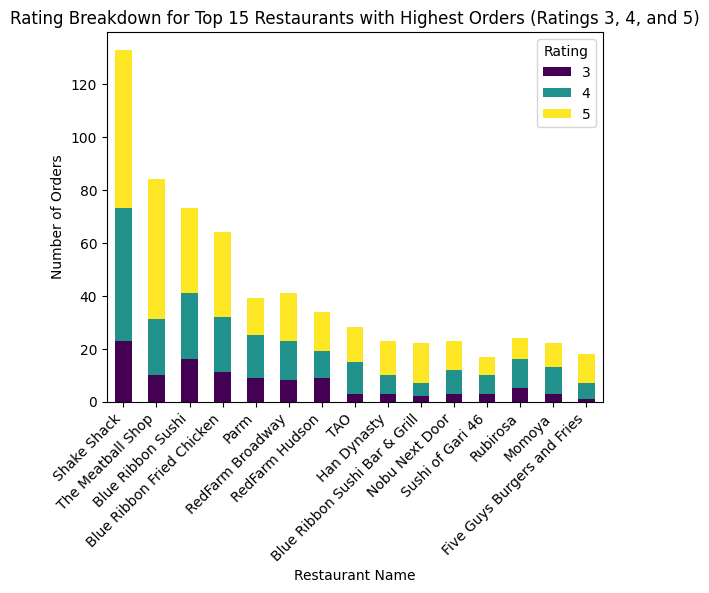

In [17]:
# Get the top 15 restaurants by total orders
top_15_restaurants = data['restaurant_name'].value_counts().head(15).index

# Create an empty dictionary to store the results
rating_breakdown = {}

# Iterate through the top 15 restaurants
for restaurant in top_15_restaurants:
    # Filter data for the current restaurant and ratings 3, 4, and 5
    filtered_data = data[
        (data['restaurant_name'] == restaurant) & (data['rating'].isin(['3', '4', '5']))
    ]

    # Calculate the count for each rating
    rating_counts = filtered_data['rating'].value_counts()

    # Store the counts in the dictionary
    rating_breakdown[restaurant] = rating_counts

# Create a DataFrame from the dictionary
rating_breakdown_df = pd.DataFrame(rating_breakdown).T.fillna(0)

# Create the bar plot
plt.figure(figsize=(15, 6))
rating_breakdown_df.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Rating Breakdown for Top 15 Restaurants with Highest Orders (Ratings 3, 4, and 5)')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating')
plt.show()

Observation from the graphs above, we can see that these top 15 restaurants, they have the highest number of 3 and 4 ratings. And ratings are mixed per restaurant, some orders get 5's also. There may be some opportunities here for these restaurants to improve customer satisfaction.

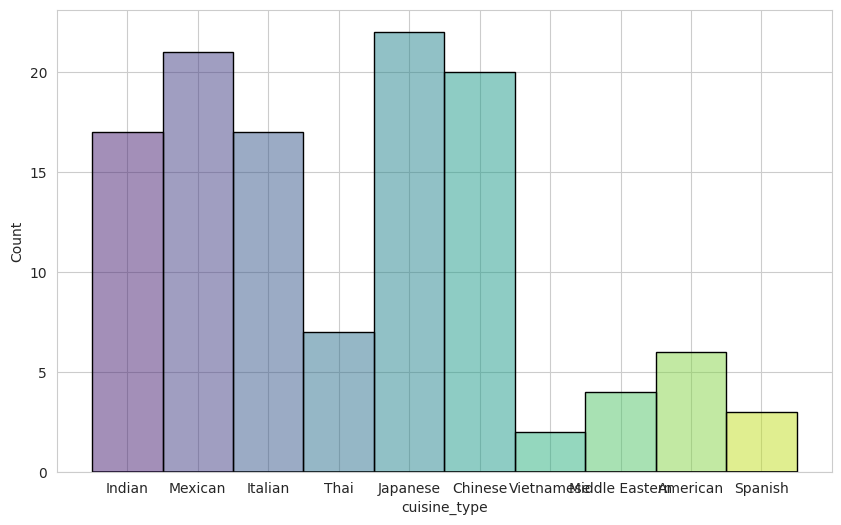

In [85]:
# Filter out "Not given" ratings and convert to numeric
data['rating_numeric'] = pd.to_numeric(data['rating'], errors='coerce')

# Group by restaurant and get minimum and maximum ratings
restaurant_ratings = data.groupby('restaurant_name')['rating_numeric'].agg(['min', 'max'])

# Filter for restaurants with only 5 ratings (min = max = 5)
all_5_ratings_restaurants = restaurant_ratings[
    (restaurant_ratings['min'] == 5) & (restaurant_ratings['max'] == 5)
].index

# Filter original data for restaurants with only 5 ratings
filtered_data = data[data['restaurant_name'].isin(all_5_ratings_restaurants)]

# Group by cuisine type and list the restaurants
cuisine_restaurants = filtered_data.groupby('cuisine_type')['restaurant_name'].unique()

# Create a histogram of cuisine counts
cuisine_counts = filtered_data['cuisine_type'].value_counts()

# Filter out "Not given" ratings and convert to numeric
data['rating_numeric'] = pd.to_numeric(data['rating'], errors='coerce')

# Group by restaurant and get minimum and maximum ratings
restaurant_ratings = data.groupby('restaurant_name')['rating_numeric'].agg(['min', 'max'])

# Filter for restaurants with only 5 ratings (min = max = 5)
all_5_ratings_restaurants = restaurant_ratings[
    (restaurant_ratings['min'] == 5) & (restaurant_ratings['max'] == 5)
].index

# Filter original data for restaurants with only 5 ratings
filtered_data = data[data['restaurant_name'].isin(all_5_ratings_restaurants)]

# Group by cuisine type and list the restaurants
cuisine_restaurants = filtered_data.groupby('cuisine_type')['restaurant_name'].unique()

# Create a histogram of cuisine counts
cuisine_counts = filtered_data['cuisine_type'].value_counts()

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
# Corrected code using palette with hue
sns.histplot(data=filtered_data, x='cuisine_type', hue='cuisine_type', bins=len(cuisine_counts), edgecolor='black', kde=False,
    palette='viridis',
    legend=False)  # Prevents duplicate legend since x-axis already shows categories

plt.show()

Of restaurants with perfect 5 ratings, Japanese restaurants are the most excellent, with 8 in this category, followed by Indian and Italian tie, and chinese and Mexican in 3rd place. Only 1 Vietnamese and 2 middle easter and spanish have 2 restaurants with perfect ratings. American cuisine has 5 in this category.

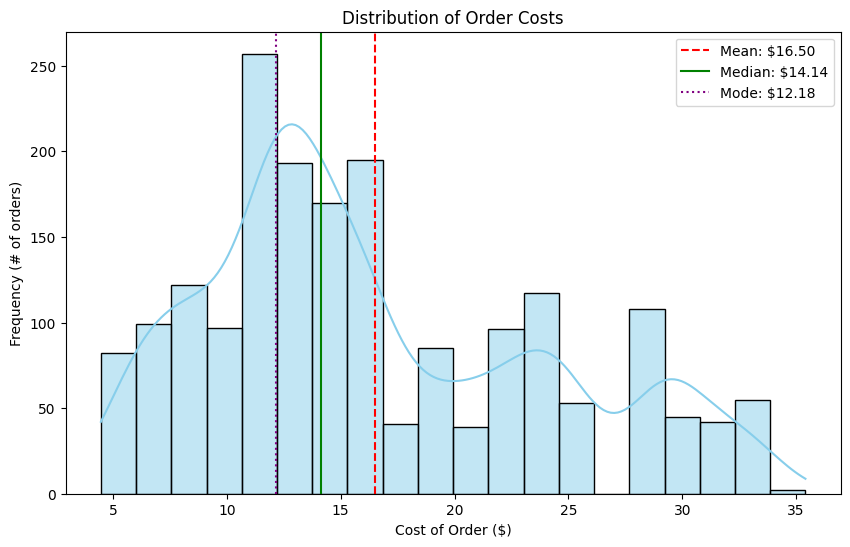

In [ ]:
# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(data['cost_of_the_order'], bins=20, color='skyblue', edgecolor='black', kde=True)

# Calculate mean, median, and mode
mean_cost = data['cost_of_the_order'].mean()
median_cost = data['cost_of_the_order'].median()
mode_cost = data['cost_of_the_order'].mode()[0]  # Get the first mode if there are multiple

# Add vertical lines for mean, median, and mode
plt.axvline(x=mean_cost, color='red', linestyle='--', label=f'Mean: ${mean_cost:.2f}')
plt.axvline(x=median_cost, color='green', linestyle='-', label=f'Median: ${median_cost:.2f}')
plt.axvline(x=mode_cost, color='purple', linestyle=':', label=f'Mode: ${mode_cost:.2f}')

# Set axis labels and title
plt.xlabel('Cost of Order ($)')
plt.ylabel('Frequency (# of orders)')
plt.title('Distribution of Order Costs')

# Add legend
plt.legend()

# Show the plot
plt.show()

We see the highest volume of orders between $10-15. Mean is higher than mode and median, i.e. there are some bigger orders, skewing the data to the right.  

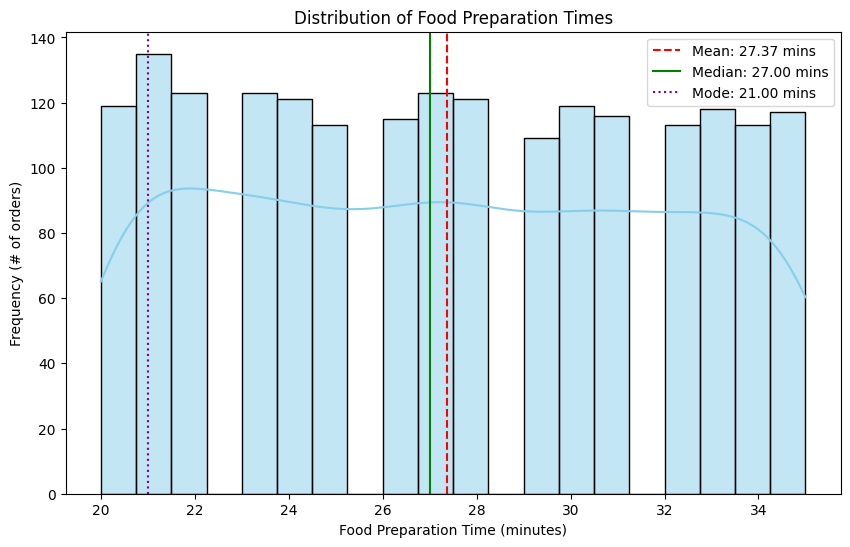

In [ ]:
# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(data['food_preparation_time'], bins=20, color='skyblue', edgecolor='black', kde=True)

# Calculate mean, median, and mode for food preparation time
mean_prep_time = data['food_preparation_time'].mean()
median_prep_time = data['food_preparation_time'].median()
mode_prep_time = data['food_preparation_time'].mode()[0]  # Get the first mode if there are multiple

# Add vertical lines for mean, median, and mode (food preparation time)
plt.axvline(x=mean_prep_time, color='red', linestyle='--', label=f'Mean: {mean_prep_time:.2f} mins')
plt.axvline(x=median_prep_time, color='green', linestyle='-', label=f'Median: {median_prep_time:.2f} mins')
plt.axvline(x=mode_prep_time, color='purple', linestyle=':', label=f'Mode: {mode_prep_time:.2f} mins')

# Set axis labels and title
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency (# of orders)')
plt.title('Distribution of Food Preparation Times')

# Add legend
plt.legend()

# Show the plot
plt.show()

This is interesting that mean and median prep time is very close and that they are equally distributed to the left and right. Indeed, we saw from the data description that standard deviation is about 4.5 mins. It would be interesting to compare prep time to order size later.

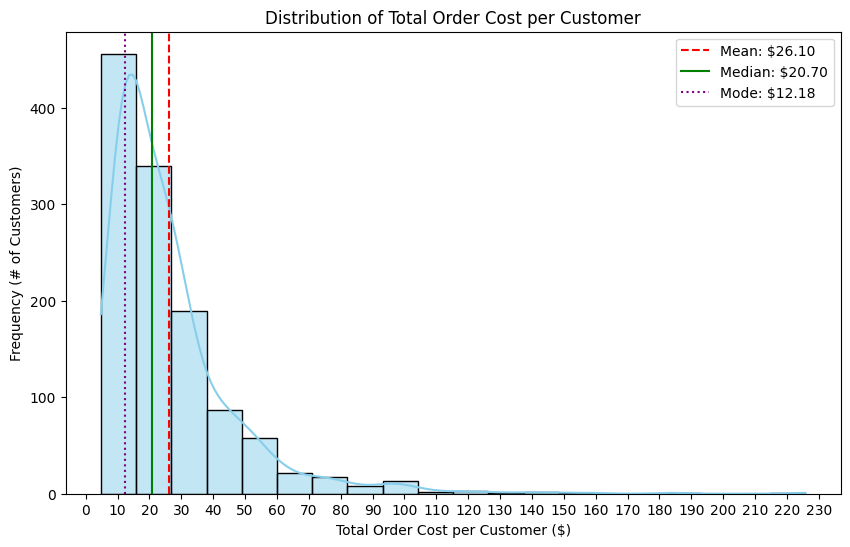

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Group by customer_id and sum the cost of orders
customer_total_cost = data.groupby('customer_id')['cost_of_the_order'].sum()

# Calculate mean, median, and mode
mean_cost = customer_total_cost.mean()
median_cost = customer_total_cost.median()
mode_cost = customer_total_cost.mode()[0]  # Get the first mode if there are multiple

# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(customer_total_cost, bins=20, color='skyblue', edgecolor='black', kde=True)

# Add vertical lines for mean, median, and mode
plt.axvline(x=mean_cost, color='red', linestyle='--', label=f'Mean: ${mean_cost:.2f}')
plt.axvline(x=median_cost, color='green', linestyle='-', label=f'Median: ${median_cost:.2f}')
plt.axvline(x=mode_cost, color='purple', linestyle=':', label=f'Mode: ${mode_cost:.2f}')

# Set axis labels and title
plt.xlabel('Total Order Cost per Customer ($)')
plt.ylabel('Frequency (# of Customers)')
plt.title('Distribution of Total Order Cost per Customer')

# Set x-axis ticks with $10 increments
plt.xticks(np.arange(0, customer_total_cost.max() + 10, 10))

# Add legend
plt.legend()

# Show the plot
plt.show()

Most customers spend between $5-15, followed by $15-25. The mean being $26, meaning 50% spend less than $26. This graph is right skewed since few customers spend more than $60 and the way to max of $225, i.e. most customers have low volume of  repeated transactions.

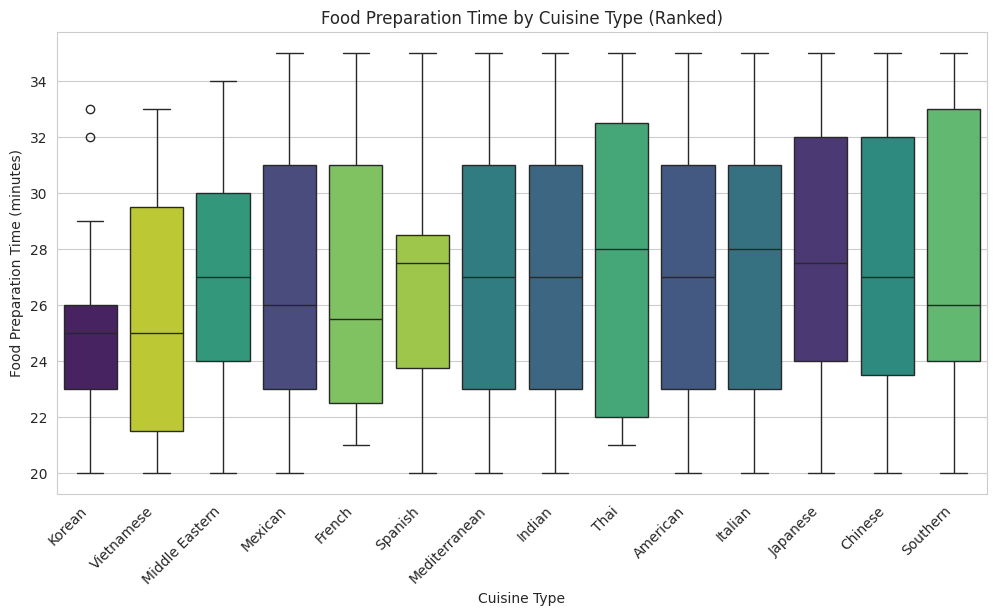

In [86]:
# Calculate the average food preparation time for each cuisine type
cuisine_prep_times = data.groupby('cuisine_type')['food_preparation_time'].mean()

# Sort the cuisine types by average preparation time in ascending order
ranked_cuisines = cuisine_prep_times.sort_values() # Changed to sort_values()

# Create the boxplot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.boxplot(x='cuisine_type', y='food_preparation_time', hue='cuisine_type', data=data, order=ranked_cuisines.index, palette='viridis')  # Using .index to get the cuisine names
plt.title('Food Preparation Time by Cuisine Type (Ranked)')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time (minutes)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Food prep mean across cuisine is quite similar, between the range of 25-27 mins, and largely evenly distributed. Though 50% spanish cuisine orders are faster than the mean, while 50% of Southern food orders take much longer than its mean.

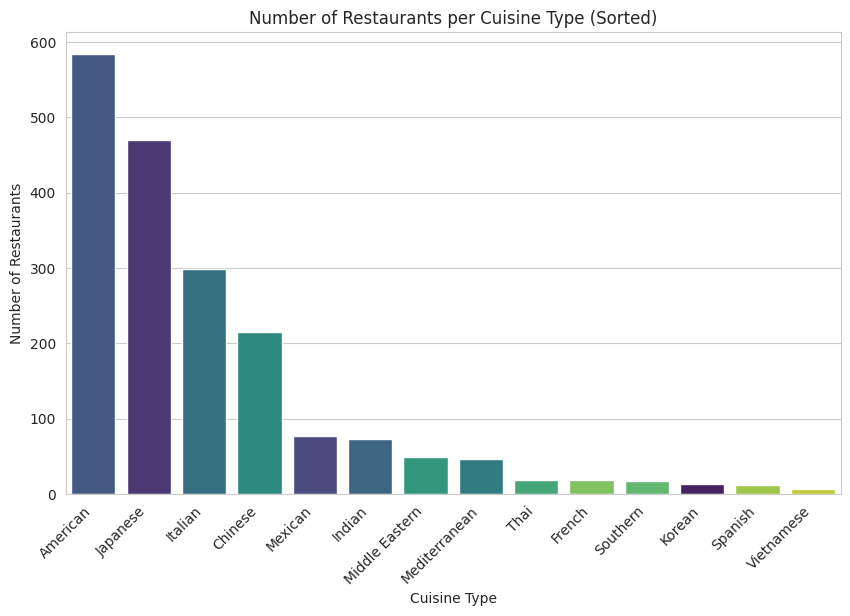

In [93]:
# Calculate the counts of restaurants for each cuisine type
cuisine_type_counts = data['cuisine_type'].value_counts()

# Sort cuisine types by restaurant count in descending order
sorted_cuisine_counts = cuisine_type_counts.sort_values(ascending=False)

# Create the histogram using Seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
# Use the 'cuisine_type' column from the 'data' DataFrame for the x-axis
# and specify 'cuisine_type' for hue to group by cuisine type
# Use the 'order' parameter to sort the bars based on 'sorted_cuisine_counts'
sns.countplot(x='cuisine_type', data=data, hue='cuisine_type', palette='viridis', order=sorted_cuisine_counts.index, legend=False)
plt.title('Number of Restaurants per Cuisine Type (Sorted)')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

American restuarants are the largest group, with alomost 600 in this database, followed by Japanese and Italian (half of American). This must indicate that American cuisione is the most popular, for the market to be able to sustain so many. Comparatively, Vietnamese, Spanish, Korean, Southern, French and Thai has less than 30 each.

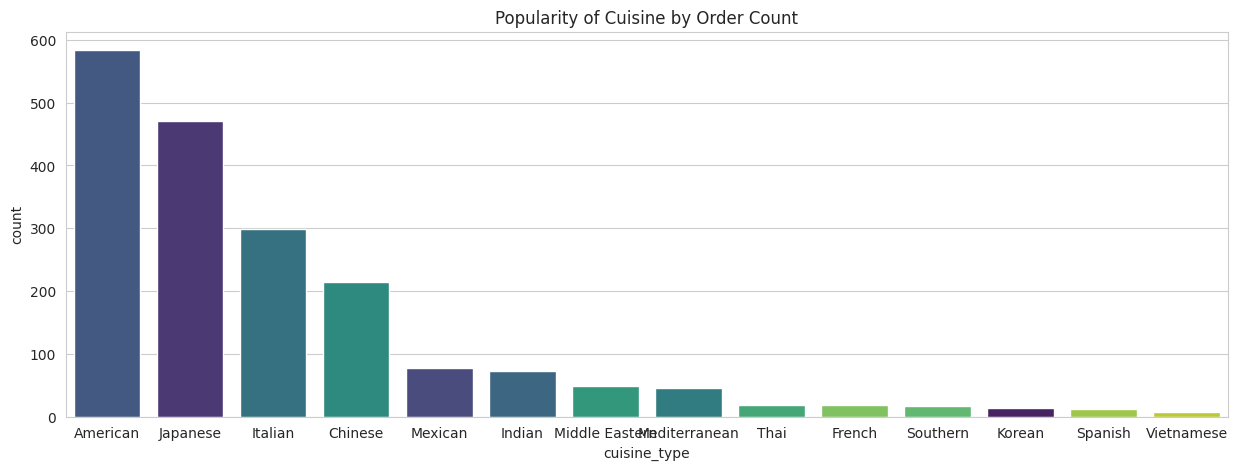

In [94]:
plt.figure(figsize = (15,5))
sns.countplot(data = data, x = 'cuisine_type', hue='cuisine_type', palette='viridis', order=sorted_cuisine_counts.index, legend=False)
plt.title("Popularity of Cuisine by Order Count")  # Add this line to set the title
plt.show()
# Assuming you intended to use the `palette` parameter instead of `%colors`
# sns.countplot(data = data, x = 'cuisine_type')

This graph supports the one above. The highest number of orders corresponse to the number of restaurants by cuisine. Top four: American, Japanese, Italian, and Chinese.

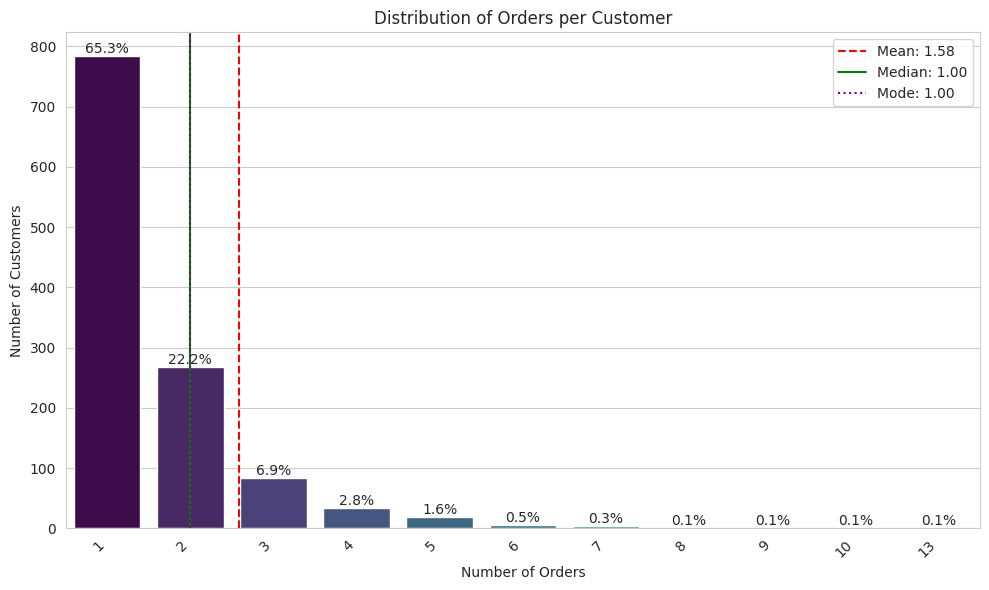

Mean orders per customer: 1.58
Median orders per customer: 1.00
Mode orders per customer: 1.00


In [102]:
# Assuming your DataFrame is named 'data'

# Calculate the number of orders per customer ID
orders_per_customer = data.groupby('customer_id')['order_id'].count()

# Calculate the frequency of each order count
order_frequency = orders_per_customer.value_counts().sort_index()

# Calculate total number of customers
total_customers = len(orders_per_customer)

# Calculate mean, median, and mode
mean_orders = orders_per_customer.mean()
median_orders = orders_per_customer.median()
mode_orders = orders_per_customer.mode()[0]  # Get the first mode if there are multiple

# Create a bar plot to visualize the order frequency
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=order_frequency.index, y=order_frequency.values, hue=order_frequency.index, palette='viridis', dodge=False, legend=False)

plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')

# Add annotations for mean, median, and mode
plt.axvline(x=mean_orders, color='red', linestyle='--', label=f'Mean: {mean_orders:.2f}')
plt.axvline(x=median_orders, color='green', linestyle='-', label=f'Median: {median_orders:.2f}')
plt.axvline(x=mode_orders, color='purple', linestyle=':', label=f'Mode: {mode_orders:.2f}')
plt.legend()

# Add percentage annotations above each bar
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_customers) * 100
    ax.text(p.get_x() + p.get_width() / 2., height + 5,  # Adjust position as needed
            f'{percentage:.1f}%', ha="center")  # Display percentage with 1 decimal place

plt.tight_layout()
plt.show()

# Print the mean, median, and mode
print(f"Mean orders per customer: {mean_orders:.2f}")
print(f"Median orders per customer: {median_orders:.2f}")
print(f"Mode orders per customer: {mode_orders:.2f}")

65% of customers only have 1 order, 22% made 2 orders, and 7% made 3 orders. There is a lot of opportunity here for customer stickiness to the app.

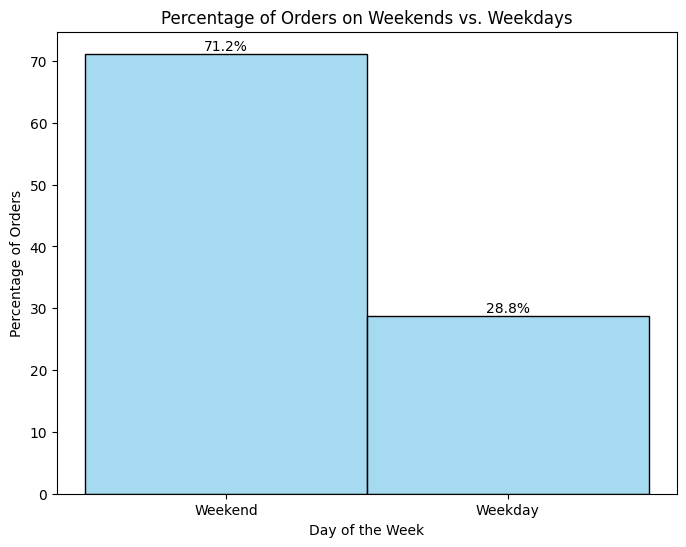

In [ ]:
# Calculate the count of orders for each day of the week
day_counts = data['day_of_the_week'].value_counts()

# Calculate the percentages
day_percentages = (day_counts / day_counts.sum()) * 100

# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
ax = sns.histplot(data['day_of_the_week'], stat="percent", bins=2, color='skyblue', edgecolor='black')

# Annotate bars with percentages
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
            f'{height:.1f}%', ha="center")

plt.title('Percentage of Orders on Weekends vs. Weekdays')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Orders')
plt.show()

Weekend orders are more than 2X weekday orders.

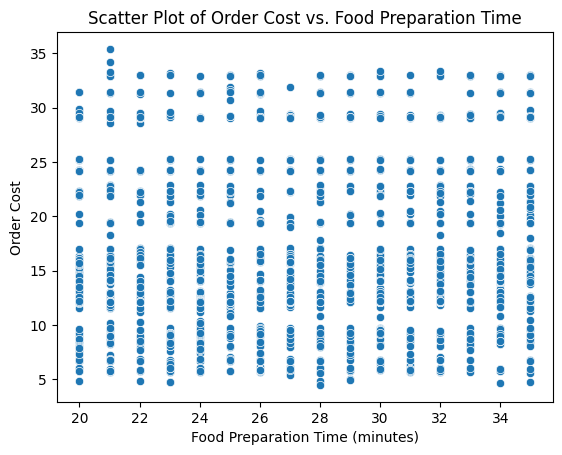

In [ ]:
# Assuming your DataFrame is named 'data'
# and has columns 'price' and 'food_preparation_time'

sns.scatterplot(x='food_preparation_time', y='cost_of_the_order', data=data)
plt.title('Scatter Plot of Order Cost vs. Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Order Cost')
plt.show()

There is not much correlation between order cost and speed of food prep.

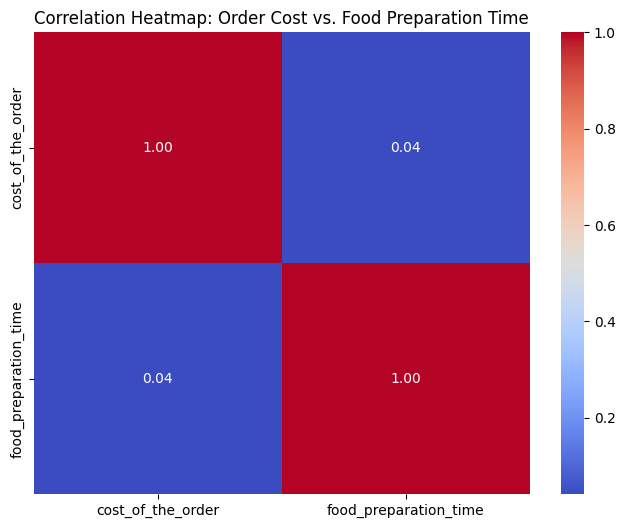

In [ ]:
# Select the columns of interest
correlation_data = data[['cost_of_the_order', 'food_preparation_time']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Order Cost vs. Food Preparation Time')
plt.show()

The above heatmap shows little correlation at 0.04 between food prep time and cost.

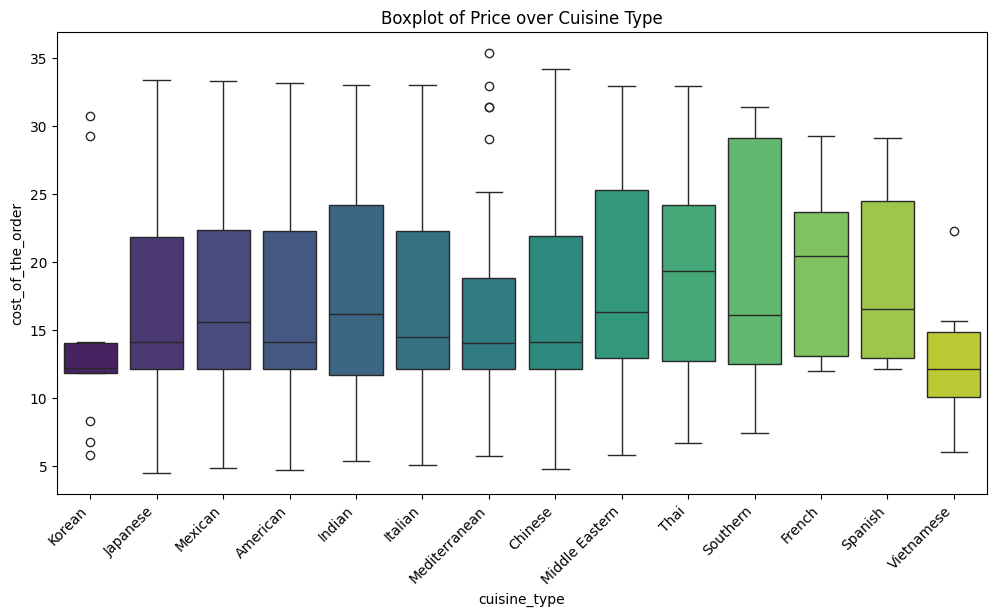

In [38]:
# Assuming your DataFrame is named 'data'
# and has columns 'cuisine_type' and 'price'

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.boxplot(x='cuisine_type', y='cost_of_the_order', hue='cuisine_type', data=data, palette='viridis')
plt.title('Boxplot of Price over Cuisine Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Order cost is lowest for Vietnamese cuisine, followed by Korean. The mean order cost is about the same for all cuisine, ranging between $14-16, with Thai and French being the highest! However, some cuisine like the Southern, Spanish, Middle Eastern and Indian 3rd quartile can go up in price. Chinese, American, Japanese and Mexican can long tails even though their mean is low.

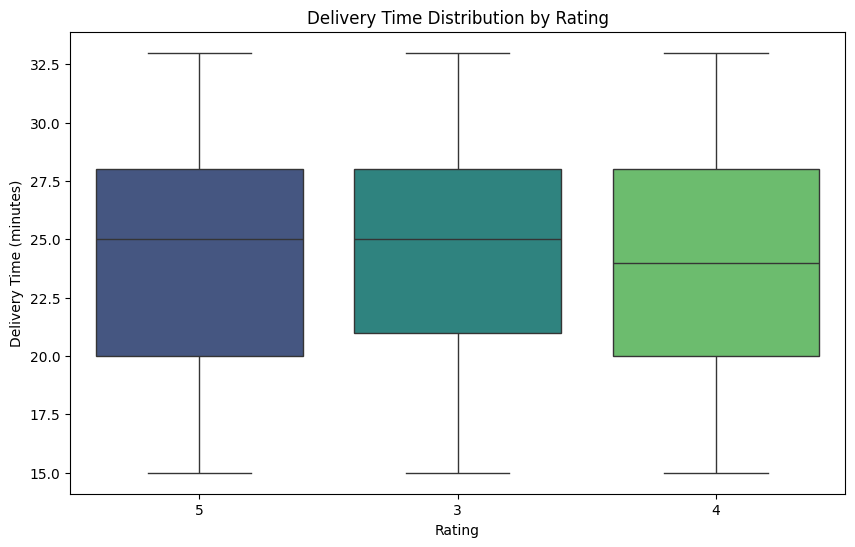

In [41]:
# Filter out 'Not given' ratings if present
filtered_data = data[data['rating'] != 'Not given']

plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='delivery_time', hue='rating', data=filtered_data, palette='viridis')
plt.title('Delivery Time Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Delivery Time (minutes)')
plt.show()

Delivery time does not seem to affect rating since th mean and 25th and 75th percentiles are very similar.

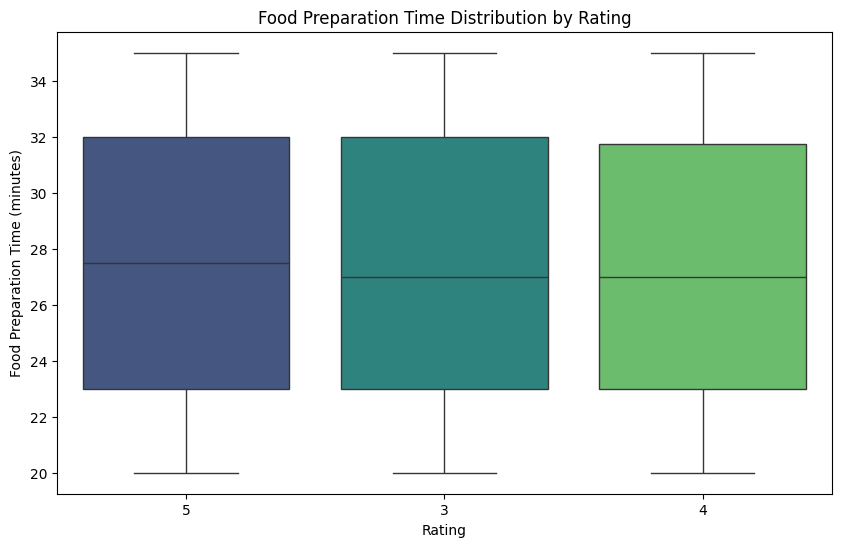

In [43]:
# Filter out 'Not given' ratings if present
filtered_data = data[data['rating'] != 'Not given']

plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='food_preparation_time',hue='rating', data=filtered_data, palette='viridis')
plt.title('Food Preparation Time Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time (minutes)')
plt.show()

Coincidentally, food prep time also does not seem to affect rating since th mean and 25th and 75th percentiles are very similar.

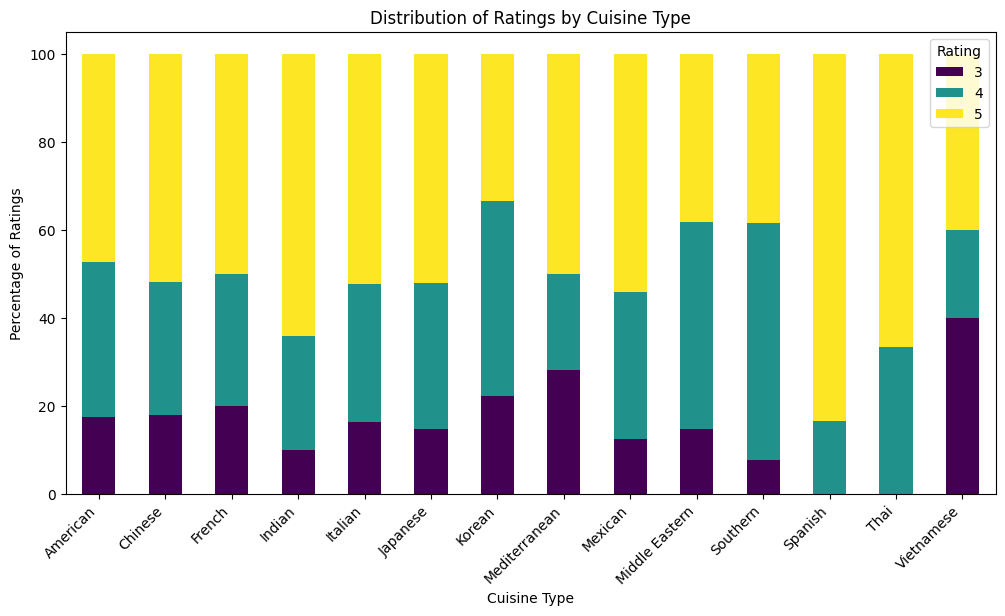

In [44]:
# Filter out 'Not given' ratings if present
filtered_data = data[data['rating'] != 'Not given']

# Create a cross-tabulation to get counts for each rating within each cuisine
cuisine_rating_cross_tab = pd.crosstab(filtered_data['cuisine_type'], filtered_data['rating'])

# Normalize the cross-tabulation to get percentages
cuisine_rating_percentages = cuisine_rating_cross_tab.div(cuisine_rating_cross_tab.sum(axis=1), axis=0) * 100

# Create the stacked bar chart
cuisine_rating_percentages.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribution of Ratings by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Percentage of Ratings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating')
plt.show()

We see that the top cuisine: American, Japanese, Italian and Chinese has similar rating distribution. Vietnamese, the least popular has high volume of 3, while Spanish and Thai, though not popular enjoy majority of 5 ratings.

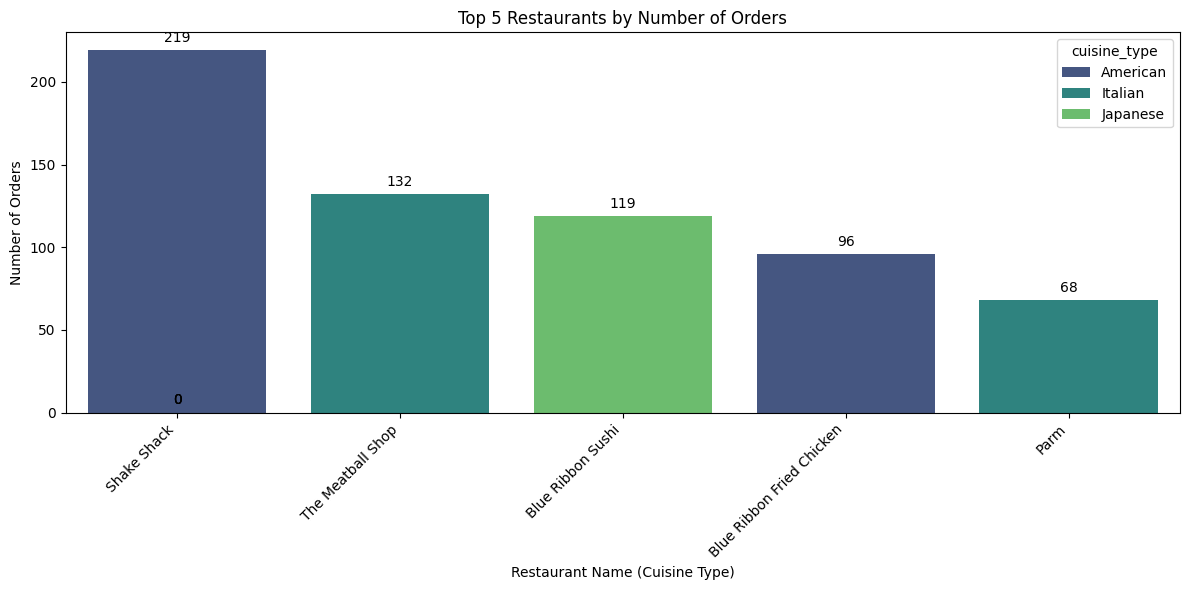

In [45]:
# Question 7: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

# Assuming your DataFrame is named 'data'

# Group by restaurant name and count the number of orders
restaurant_order_counts = data.groupby('restaurant_name')['order_id'].count()

# Sort the restaurants by order count in descending order and select the top 5
top_5_restaurants = restaurant_order_counts.sort_values(ascending=False).head(5)

# Create a DataFrame for the top 5 restaurants with their cuisine types
top_5_restaurants_df = pd.DataFrame({
    'restaurant_name': top_5_restaurants.index,
    'order_count': top_5_restaurants.values
})
top_5_restaurants_df['cuisine_type'] = top_5_restaurants_df['restaurant_name'].apply(
    lambda restaurant_name: data[data['restaurant_name'] == restaurant_name]['cuisine_type'].iloc[0]
)

# Create the histogram using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='restaurant_name', y='order_count', hue='cuisine_type', data=top_5_restaurants_df, palette='viridis', dodge=False)
plt.title('Top 5 Restaurants by Number of Orders')
plt.xlabel('Restaurant Name (Cuisine Type)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Annotate bars with order counts
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5,  # Adjust position as needed
            int(height), ha="center")  # Display order count as an integer

plt.tight_layout()
plt.show()


It makes sense that 2 of top restaurants by orders are American, followed by 2 Italian and 1 Japanese. This corresponds with popularity by orders and number of restaurants.

Order cost to food prep does not seem to have a correlation from the scatter plot as well as heat map.

In [60]:
#Question 8: Which is the most popular cuisine on weekends? [1 mark]

# Filter data for weekend orders
weekend_data = data[data['day_of_the_week'].isin(['Weekend'])]

# Check if weekend_data is empty
if weekend_data.empty:
    print("No orders found for weekends in the dataset.")
else:
    # Group by cuisine type and count orders
    cuisine_counts = weekend_data.groupby('cuisine_type')['order_id'].count()

    # Find the most popular cuisine
    most_popular_cuisine = cuisine_counts.idxmax()  # Get the index (cuisine type) with the maximum count

    # Print the result
    print(f"The most popular cuisine on weekends is: {most_popular_cuisine}")



The most popular cuisine on weekends is: American


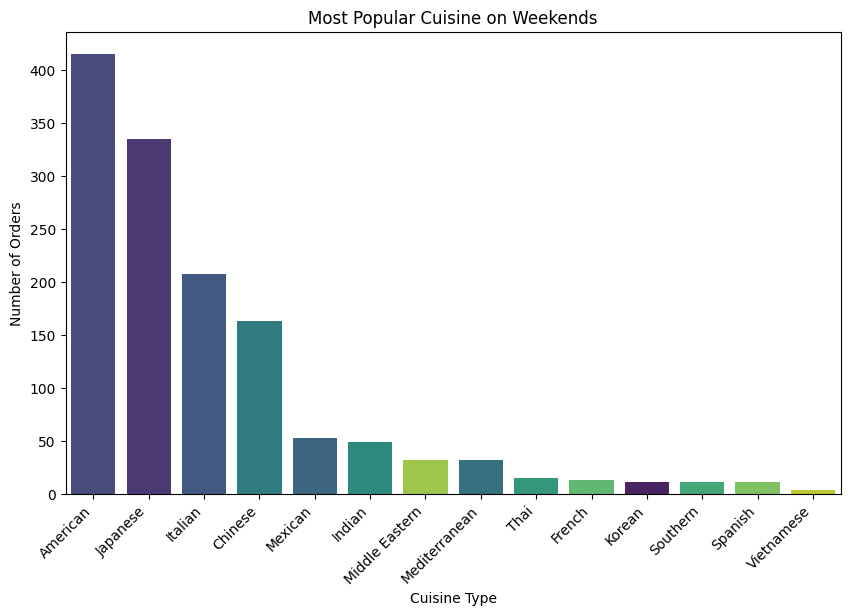

In [52]:
# Filter data for weekend orders
weekend_data = data[data['day_of_the_week'].isin(['Weekend'])]

# Group by cuisine type and count orders
cuisine_counts = weekend_data.groupby('cuisine_type')['order_id'].count()

# Sort cuisine types by order count in descending order
sorted_cuisine_counts = cuisine_counts.sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
# Pass the original weekend_data DataFrame to the 'data' parameter
# and specify 'cuisine_type' for both x and hue
sns.barplot(x='cuisine_type', y='order_id', hue='cuisine_type', data=weekend_data, estimator=len, palette='viridis', order=sorted_cuisine_counts.index)
plt.title('Most Popular Cuisine on Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

Most popular is American, followed by Japanese, Italian and Chinese. This corresponds with number of orders and number of restaurants, which supports their popularity.

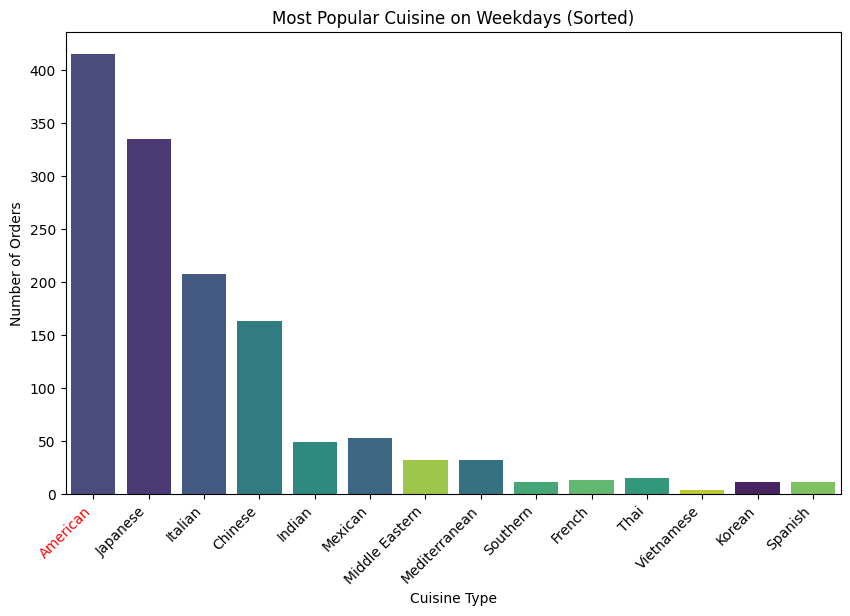

The most popular cuisine on weekdays is: American


In [63]:
# Filter data for weekday orders
weekday_data = data[data['day_of_the_week'] == 'Weekday']

# Group by cuisine type and count orders
cuisine_counts = weekday_data.groupby('cuisine_type')['order_id'].count()

# Sort cuisine types by order count in descending order
sorted_cuisine_counts = cuisine_counts.sort_values(ascending=False)

# Get the most popular cuisine
most_popular_cuisine = sorted_cuisine_counts.index[0]

# Create the bar chart with sorted cuisine types
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
# Use sorted_cuisine_counts for both x and y, and specify the order
sns.barplot(x='cuisine_type', y='order_id', hue='cuisine_type', data=weekend_data, estimator=len, palette='viridis', order=sorted_cuisine_counts.index)
plt.title('Most Popular Cuisine on Weekdays (Sorted)')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Highlight the most popular cuisine
plt.gca().get_xticklabels()[sorted_cuisine_counts.index.get_loc(most_popular_cuisine)].set_color('red')

plt.show()

# Print the most popular cuisine
print(f"The most popular cuisine on weekdays is: {most_popular_cuisine}")

Weekend or weekdays, the most popular cuisine are similarly ranked.

Percentage of orders costing more than 20 dollars: 29.24%


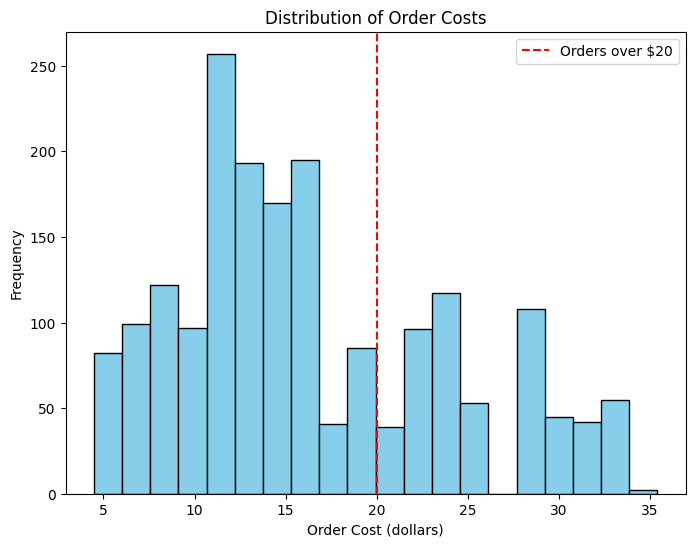

In [64]:
#Question 9: What percentage of the orders cost more than 20 dollars? [2 marks]

# Calculate the number of orders costing more than 20 dollars
orders_over_20 = data[data['cost_of_the_order'] > 20]['order_id'].count()

# Calculate the total number of orders
total_orders = data['order_id'].count()

# Calculate the percentage
percentage_over_20 = (orders_over_20 / total_orders) * 100

# Print the result
print(f"Percentage of orders costing more than 20 dollars: {percentage_over_20:.2f}%")


# Create a histogram to visualize the distribution of order costs
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.hist(data['cost_of_the_order'], bins=20, color='skyblue', edgecolor='black')  # Customize bins, color, etc.
plt.title('Distribution of Order Costs')
plt.xlabel('Order Cost (dollars)')
plt.ylabel('Frequency')

# Add a vertical line to highlight the $20 mark
plt.axvline(x=20, color='red', linestyle='--', label='Orders over $20')
plt.legend()

plt.show()

More than 70% of orders are less than $20

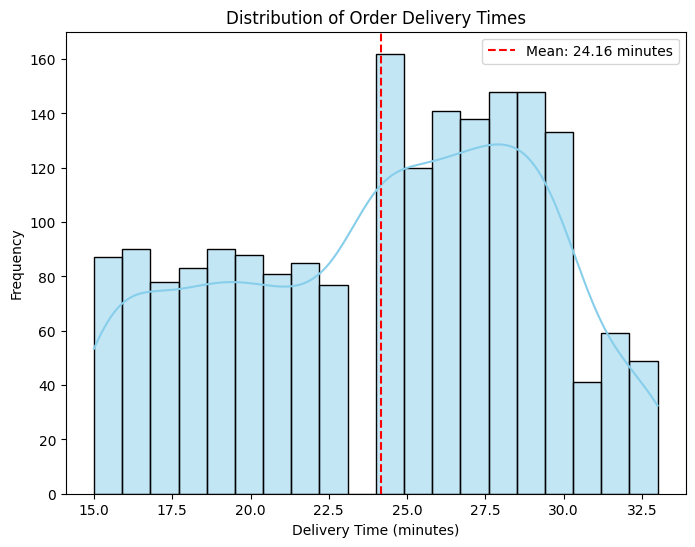

The mean order delivery time is: 24.16 minutes


In [65]:
#Question 10: What is the mean order delivery time? [1 mark]
# Calculate the mean delivery time
mean_delivery_time = data['delivery_time'].mean()

# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.histplot(data['delivery_time'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Order Delivery Times')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')

# Add a vertical line to represent the mean delivery time
plt.axvline(x=mean_delivery_time, color='red', linestyle='--', label=f'Mean: {mean_delivery_time:.2f} minutes')
plt.legend()

plt.show()

print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")

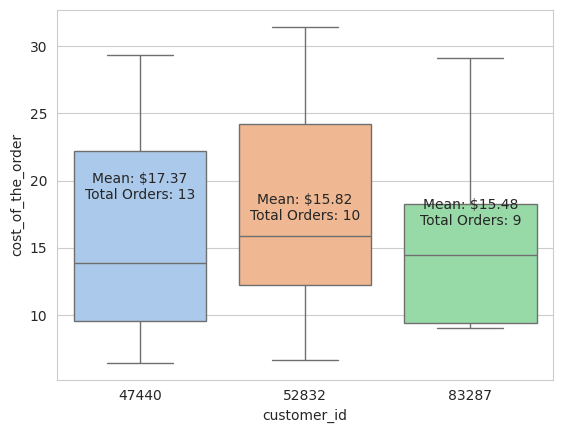

In [106]:
#Question 11: The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark

# Get the top 3 customer IDs
top_3_customer_ids = data.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3).index

# Filter the data for the top 3 customers
top_3_customer_data = data[data['customer_id'].isin(top_3_customer_ids)]

# Create the box plot
sns.boxplot(x='customer_id', y='cost_of_the_order', data=top_3_customer_data,
            hue='customer_id', palette="pastel",
            dodge=False, legend=False)

# Add mean and total orders annotations
for customer_id in top_3_customer_ids:
    mean_cost = top_3_customer_data[top_3_customer_data['customer_id'] == customer_id]['cost_of_the_order'].mean()
    total_orders = top_3_customer_data[top_3_customer_data['customer_id'] == customer_id]['order_id'].count()
    plt.text(top_3_customer_ids.get_loc(customer_id), mean_cost + 1,  # Adjust position as needed
             f'Mean: ${mean_cost:.2f}\nTotal Orders: {total_orders}', ha='center', va='bottom')

plt.show()

Each of theses customers will get 20% discounts.

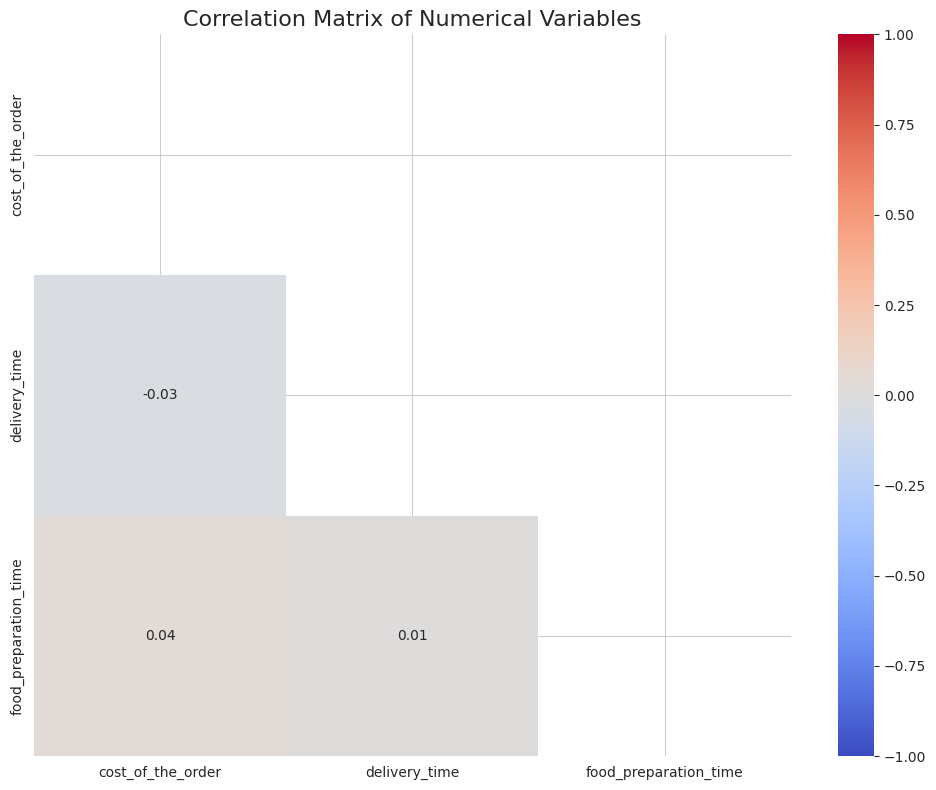

In [68]:
#Multivariate Analysis
#Question 12: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

# Set up the visualization environment
# plt.style.use('seaborn-whitegrid')  # Removed this line
# Using Seaborn's set_style instead to apply the style
sns.set_style('whitegrid') # added this line to apply the seaborn-whitegrid style
sns.set_palette('deep')

# Define your important variables (adjust these based on your specific dataset)
numerical_vars = ['cost_of_the_order', 'delivery_time', 'food_preparation_time'] # Removed 'rating' since it contains strings
categorical_vars = ['cuisine_type', 'day_of_the_week', 'payment_method'] # Changed 'payment_mode' to 'payment_method'

# 1. NUMERICAL VS NUMERICAL RELATIONSHIPS
# Create a correlation matrix and heatmap
plt.figure(figsize=(10, 8))
numerical_data = data[numerical_vars].copy()
corr = numerical_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

There is no clear correlation here between the different factors.

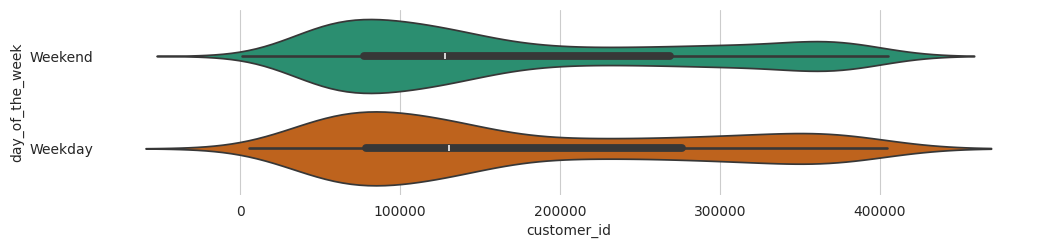

In [109]:
# @title day_of_the_week vs customer_id

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['day_of_the_week'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='customer_id', y='day_of_the_week', inner='box', hue='day_of_the_week', palette='Dark2', dodge=False, legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)

This is interesting to see orders from the same customer IDs are parallel over the weekday and weekend. It shows that customers' habits are consistent weekend and weekday. Those who order a lot on weekdays also order a lot on weekends; and those who order little over the weekday order little over the weekend also.

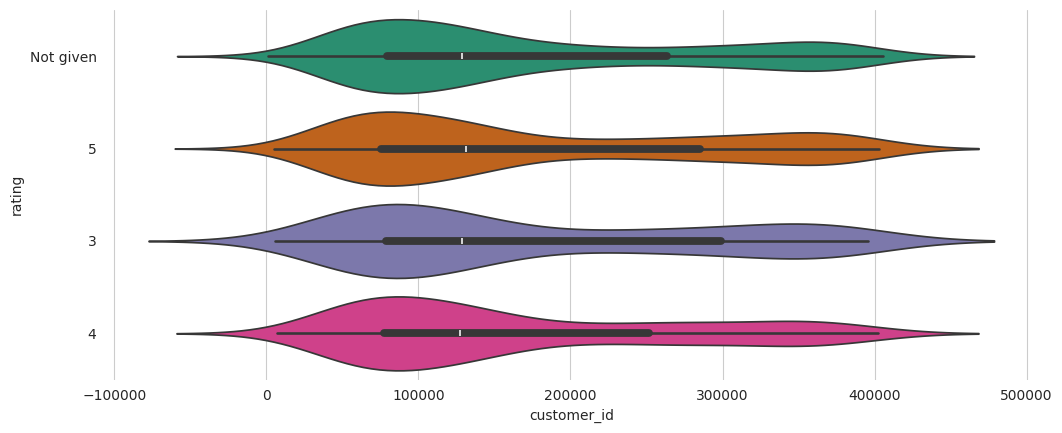

In [111]:
# @title rating vs customer_id

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['rating'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='customer_id', y='rating', inner='box', hue='rating', palette='Dark2', dodge=False, legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)

Per customer Id, the customers who did not give any rating are also the same ones giving 3,4, and 5 ratings. We cannot tell much from this

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time', 'rating_numeric',
       'total_delivery_time'],
      dtype='object')
Skipping detailed plots for cuisine_type as it has 14 categories


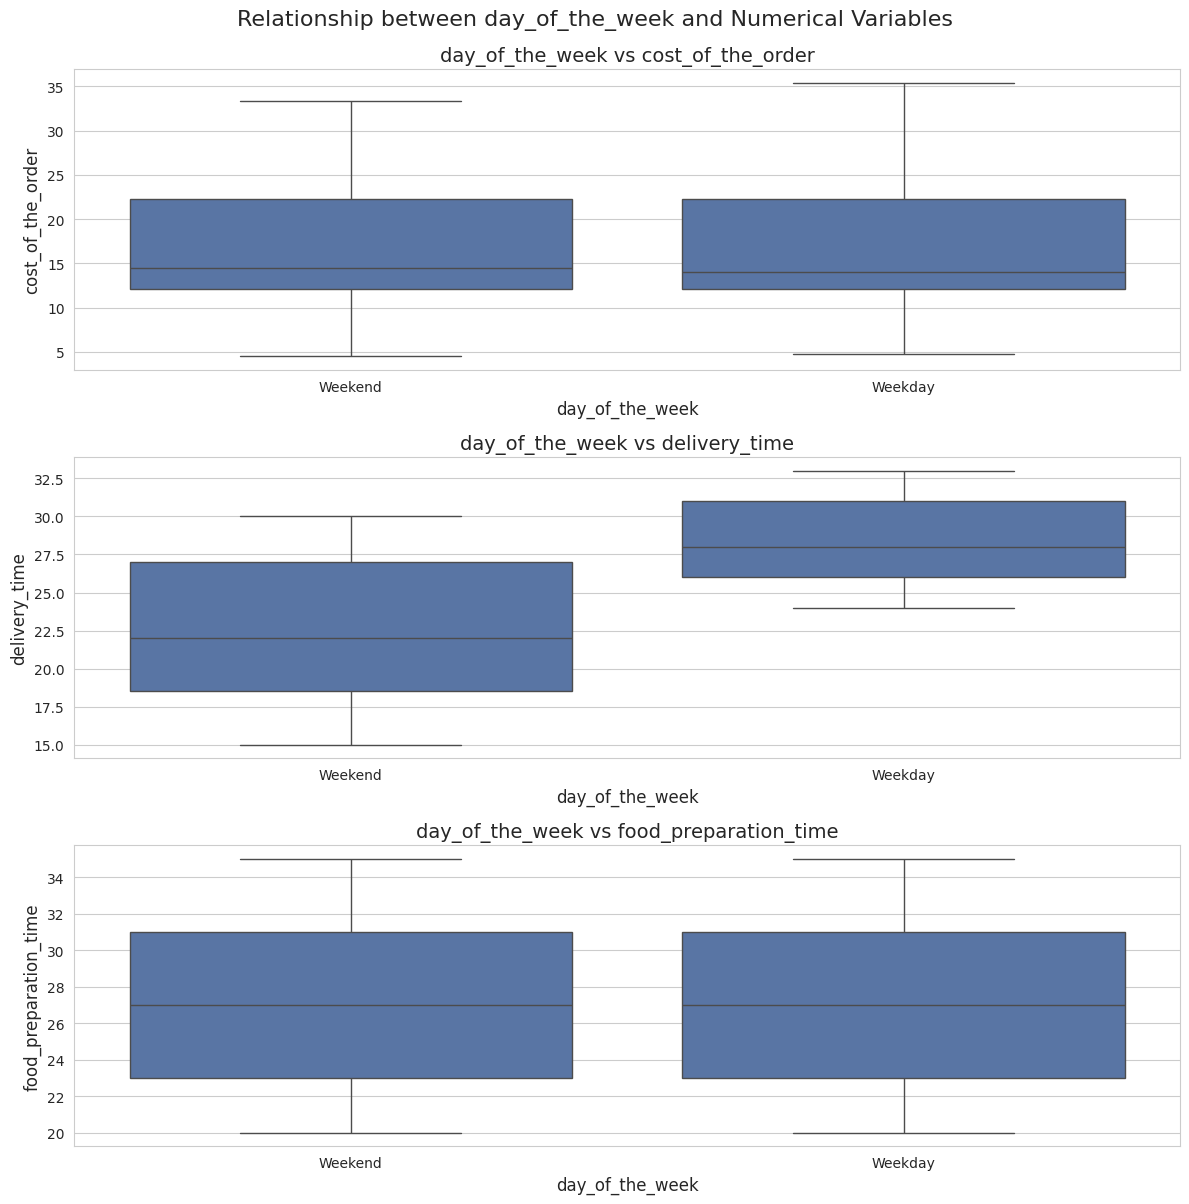

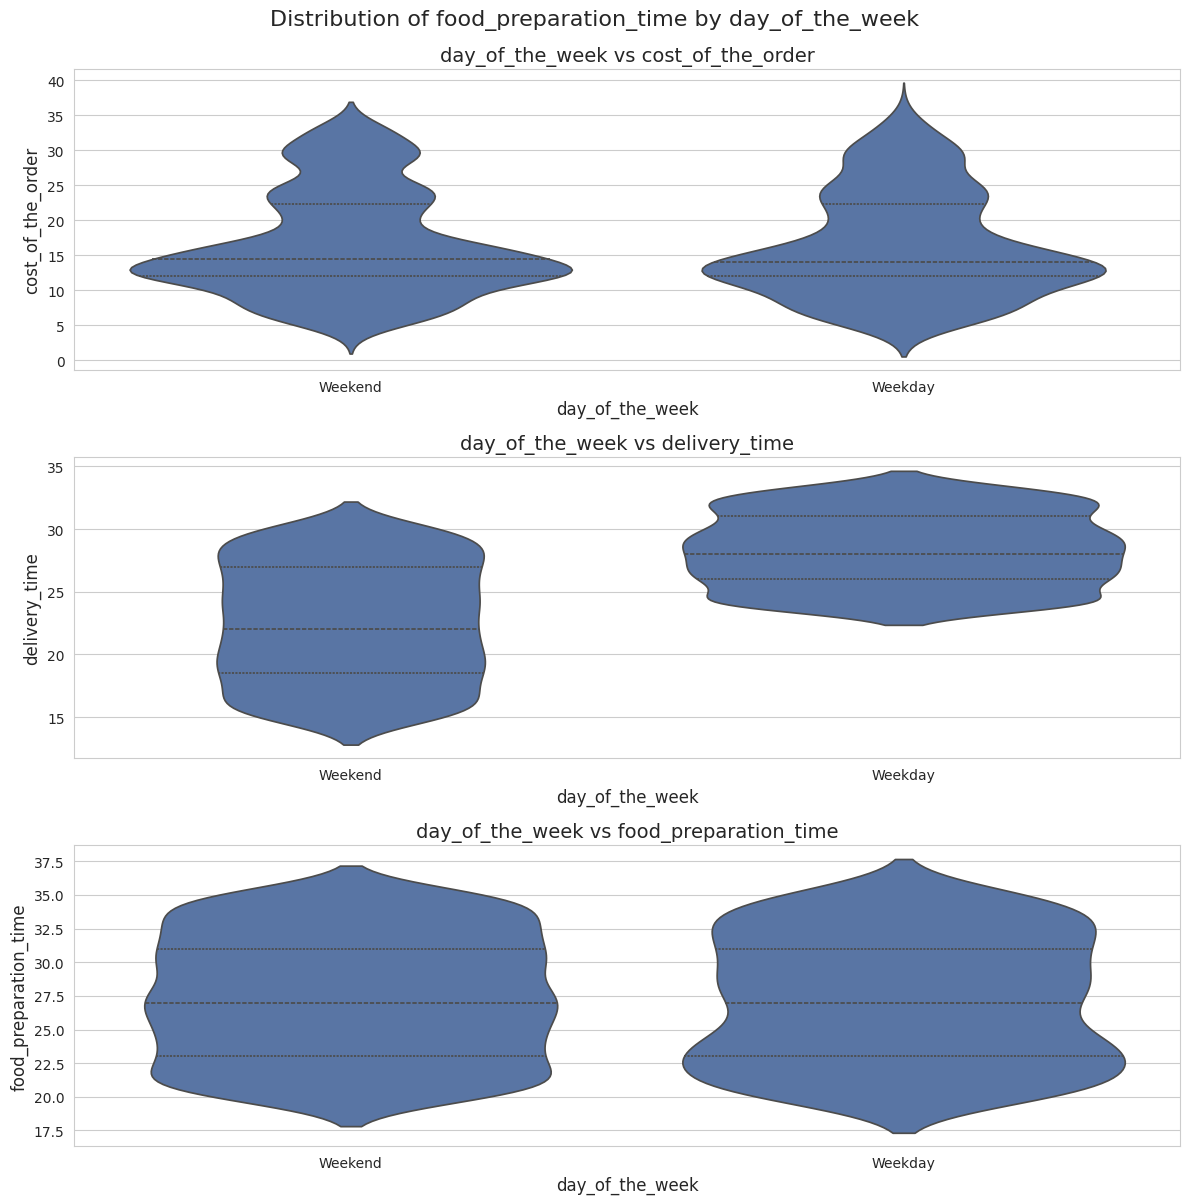

In [117]:
# 2. NUMERICAL VS CATEGORICAL RELATIONSHIPS
# For each categorical variable, analyze its relationship with numerical variables

print(data.columns)  # Print all column names
# Define your important variables (adjust these based on your specific dataset)
numerical_vars = ['cost_of_the_order', 'delivery_time', 'food_preparation_time']
# Changed 'payment_method' to 'payment_mode' here to match the column name in your data
categorical_vars = ['cuisine_type', 'day_of_the_week']

for cat_var in categorical_vars:
    # Check if there are too many categories

    n_categories = data[cat_var].nunique()
    if n_categories > 10:
        print(f"Skipping detailed plots for {cat_var} as it has {n_categories} categories")
        continue

    # Set up the figure
    fig, axes = plt.subplots(len(numerical_vars), 1, figsize=(12, 4*len(numerical_vars)))
    fig.suptitle(f'Relationship between {cat_var} and Numerical Variables', fontsize=16, y=1.0)

    # For each numerical variable
    for i, num_var in enumerate(numerical_vars):
        # Create boxplot
        sns.boxplot(x=cat_var, y=num_var, data=data, ax=axes[i])
        axes[i].set_title(f'{cat_var} vs {num_var}', fontsize=14)
        axes[i].set_xlabel(cat_var, fontsize=12)
        axes[i].set_ylabel(num_var, fontsize=12)
        if n_categories > 5:
            plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

    # Create violin plots for a different visualization
    fig, axes = plt.subplots(len(numerical_vars), 1, figsize=(12, 4*len(numerical_vars)))
    fig.suptitle(f'Distribution of {num_var} by {cat_var}', fontsize=16, y=1.0)

    for i, num_var in enumerate(numerical_vars):
        sns.violinplot(x=cat_var, y=num_var, data=data, ax=axes[i], inner='quartile')
        axes[i].set_title(f'{cat_var} vs {num_var}', fontsize=14)
        axes[i].set_xlabel(cat_var, fontsize=12)
        axes[i].set_ylabel(num_var, fontsize=12)
        if n_categories > 5:
            plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

The graphs above do not show any significant pattern. We see that orders across cost are geting the same number of 3, 4, 5 ratings. Same as delivery time, As delivery time goes up, rating is evenly distributed. Prep and delivery time is also uniformly distributed.
Rating and cost are similar weekend vs weekdays.
Delivery time is markedly shorter on weekend even though the volume is more than 2X.Weekend orders get more 4's and 5's.

In [74]:
# Group by restaurant name and calculate rating counts and average ratings
restaurant_ratings = data.groupby('restaurant_name')['rating'].agg(['count', lambda x: pd.to_numeric(x, errors='coerce').mean()])
restaurant_ratings = restaurant_ratings.rename(columns={'<lambda_0>': 'mean'}) # Rename the '<lambda_0>' column to 'mean'

# Filter restaurants based on the criteria
filtered_restaurants = restaurant_ratings[
    (restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)
]

# Get the names of the filtered restaurants
promotional_restaurants = filtered_restaurants.index.tolist()

# Print the results
print("Restaurants eligible for the promotional offer:")
for restaurant in promotional_restaurants:
    print(restaurant)

Restaurants eligible for the promotional offer:
Blue Ribbon Fried Chicken
Blue Ribbon Sushi
Parm
RedFarm Broadway
RedFarm Hudson
Shake Shack
The Meatball Shop


In [75]:
# Question 14: The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

# Calculate revenue from orders over $20
revenue_over_20 = data[data['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25

# Calculate revenue from orders over $5 (excluding those over $20)
revenue_over_5 = data[(data['cost_of_the_order'] > 5) & (data['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15

# Calculate total revenue
total_revenue = revenue_over_20 + revenue_over_5

# Print the result
print(f"The net revenue generated by the company is: ${total_revenue:.2f}")

The net revenue generated by the company is: $6166.30


Percentage of orders taking more than 60 minutes: 10.54%


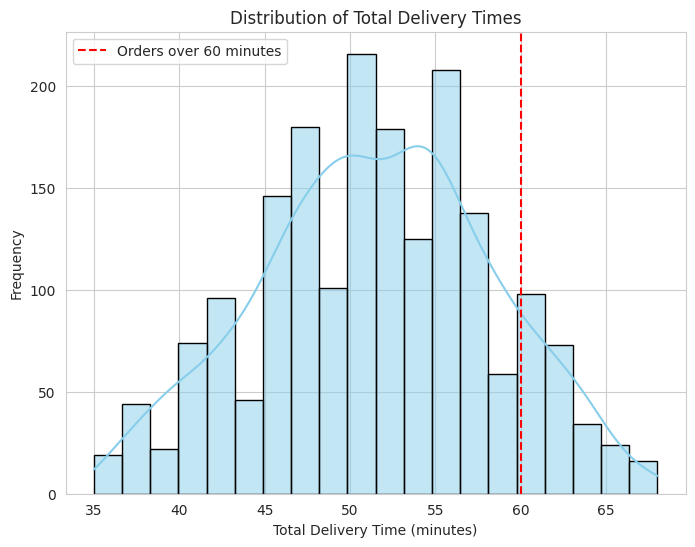

In [76]:
# Question 15: The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

# Calculate total delivery time for each order
data['total_delivery_time'] = data['food_preparation_time'] + data['delivery_time']

# Calculate the number of orders taking more than 60 minutes
orders_over_60_minutes = data[data['total_delivery_time'] > 60]['order_id'].count()

# Calculate the total number of orders
total_orders = data['order_id'].count()

# Calculate the percentage
percentage_over_60_minutes = (orders_over_60_minutes / total_orders) * 100

# Print the result
print(f"Percentage of orders taking more than 60 minutes: {percentage_over_60_minutes:.2f}%")

# Create a histogram to visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.histplot(data['total_delivery_time'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Total Delivery Times')
plt.xlabel('Total Delivery Time (minutes)')
plt.ylabel('Frequency')

# Add a vertical line to highlight the 60-minute mark
plt.axvline(x=60, color='red', linestyle='--', label='Orders over 60 minutes')
plt.legend()

plt.show()

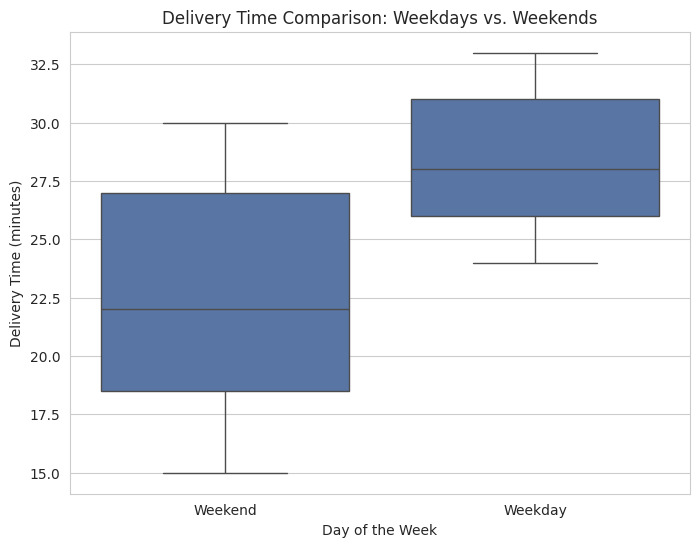

Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


In [77]:
# Question 16: The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

# Create a box plot to compare delivery times on weekdays and weekends
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.boxplot(x='day_of_the_week', y='delivery_time', data=data)
plt.title('Delivery Time Comparison: Weekdays vs. Weekends')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# Calculate and print the mean delivery times for weekdays and weekends
weekday_mean_delivery_time = data[data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
weekend_mean_delivery_time = data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print(f"Mean delivery time on weekdays: {weekday_mean_delivery_time:.2f} minutes")
print(f"Mean delivery time on weekends: {weekend_mean_delivery_time:.2f} minutes")

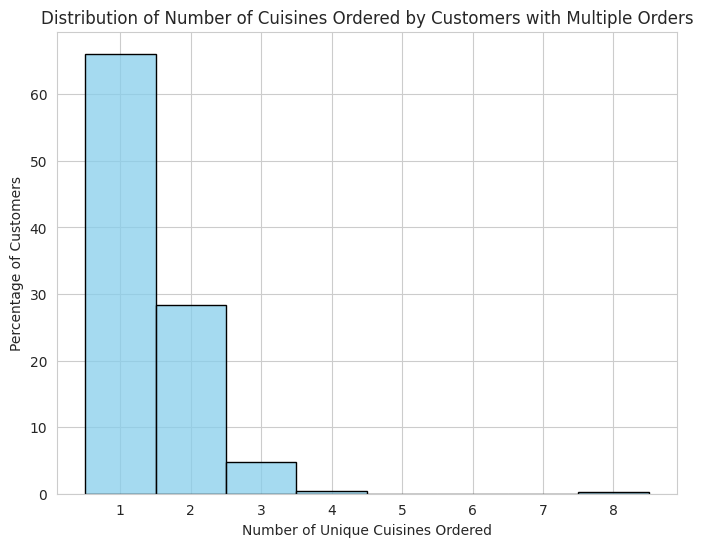

Mean number of cuisines ordered: 1.41
Median number of cuisines ordered: 1.00
Mode number of cuisines ordered: 1


In [78]:
# Group by customer_id and count orders
customer_order_counts = data.groupby('customer_id')['order_id'].count()

# Filter for customers with more than 1 order
multiple_orders_customers = customer_order_counts[customer_order_counts > 1].index

# Filter the original DataFrame for these customers
multiple_orders_data = data[data['customer_id'].isin(multiple_orders_customers)]

# Group by customer_id and count unique cuisines
cuisine_counts_per_customer = multiple_orders_data.groupby('customer_id')['cuisine_type'].nunique()

# Calculate percentages for each bin
total_customers = len(cuisine_counts_per_customer)
percentages = (np.bincount(cuisine_counts_per_customer, minlength=cuisine_counts_per_customer.max() + 1) / total_customers) * 100


plt.figure(figsize=(8, 6))
ax = sns.histplot(cuisine_counts_per_customer, bins=10, discrete=True, color='skyblue', edgecolor='black', stat='percent') # Changed stat to 'percent'
plt.title('Distribution of Number of Cuisines Ordered by Customers with Multiple Orders')
plt.xlabel('Number of Unique Cuisines Ordered')
plt.ylabel('Percentage of Customers')

plt.show()

print(f"Mean number of cuisines ordered: {cuisine_counts_per_customer.mean():.2f}")
print(f"Median number of cuisines ordered: {cuisine_counts_per_customer.median():.2f}")
print(f"Mode number of cuisines ordered: {cuisine_counts_per_customer.mode()[0]}")

Customers who have 2 or more orders showed that two-thirds ordered the same cuisine. While more than a quarter more 2 different cuisine. That means only about 5% have ordered 3 or more different cuisines.

In [79]:
#Conclusion and Recommendations
#Question 17: What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

FoodHub Strategic Transformation Plan to Increase Loyalty

Executive Summary
Despite strong restaurant partnerships and
initial user acquisition, FoodHub faces a critical retention challenge with 65% of users never returning after their first order. This comprehensive strategy addresses key operational and experiential gaps to convert one-time users into loyal customers through consistent value delivery across all touchpoints.

Core Insights

* Customer Retention Crisis: 65% of users made only one order, 22% made two. Significant opportunity to improve customer stickiness by identifying and delivering key value drivers.
* Weekday Underutilization: Weekend orders more than double weekday orders. Need to identify and remove weekday usage barriers for busy professionals.
* Competitive Positioning: Must clarify competitive advantages and enhance differentiation strategy.
* Delivery Time Challenge: Current average delivery time is 60 minutes, with 10% exceeding this. Target: reduce to 45 minutes or less.
* Weekend Efficiency Paradox: Despite 2x volume, weekend deliveries are faster than weekdays. Identify success factors to replicate on weekdays.
* Value Beyond Order Size: Minimal correlation between order size and ratings. Need to identify true customer value drivers.
* Limited Cuisine Diversity: New Yorkers heavily prefer American cuisine, followed by Japanese, Italian and Chinese. Opportunity to broaden palates.
* Market Penetration Gap: Despite strong restaurant partnerships and initial user acquisition, most users never return after their first order.

Strategic Recommendations
1. Target Market Refinement

Define high-value customer segments with precision
Tailor acquisition and retention efforts to segment-specific preferences

2. Experience Optimization

Close the 39% rating gap through review incentives
Reimagine food discovery with enhanced visuals and intuitive filters
Streamline checkout to reduce abandonment

3. Value Proposition Clarity

Establish clear differentiation from competitors
Highlight top-rated restaurants to drive quality competition
Feature daily entrées to improve kitchen efficiency

4. Retention-First Approach

Implement tiered rewards for frequent $20+ orders
Create points system for cuisine exploration
Launch weekday-specific incentives to balance order volume

5. Operational Integration

Enable multi-restaurant group ordering within 1-mile radius
Incentivize 2+ hour pre-scheduling for improved route planning
Implement performance-based driver incentives
Reduce delivery time to under 45 minutes consistently



